In [387]:
import pandas as pd
import numpy as np

data = pd.read_csv('openfoodfacts.csv', sep='delimiter', header=None, engine='python')
data

,0
0,code\turl\tcreator\tcreated_t\tcreated_datetim...
1,0000000003087\thttp://world-fr.openfoodfacts.o...
2,0000000004530\thttp://world-fr.openfoodfacts.o...
3,0000000004559\thttp://world-fr.openfoodfacts.o...
4,0000000016087\thttp://world-fr.openfoodfacts.o...
...,...
320768,9948282780603\thttp://world-fr.openfoodfacts.o...
320769,99567453\thttp://world-fr.openfoodfacts.org/pr...
320770,9970229501521\thttp://world-fr.openfoodfacts.o...
320771,9980282863788\thttp://world-fr.openfoodfacts.o...


In [388]:
data = pd.read_csv('openfoodfacts.csv', sep='\t', low_memory=False)
pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [389]:
#on ne garde que les paramètres utiles pour notre étude
selected_columns = ['product_name', 'nutrition_grade_fr',\
                    'energy_100g', 'proteins_100g',\
                    'sugars_100g', 'fat_100g', 'saturated-fat_100g',\
                    'salt_100g', 'sodium_100g', 'fiber_100g',\
                    'fruits-vegetables-nuts_100g']
new_df = data[selected_columns].copy()
new_df

,product_name,nutrition_grade_fr,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),d,2243.0,3.57,14.29,28.57,28.57,0.00000,0.000,3.6,NaN
2,Peanuts,b,1941.0,17.86,17.86,17.86,0.00,0.63500,0.250,7.1,NaN
3,Organic Salted Nut Mix,d,2540.0,17.86,3.57,57.14,5.36,1.22428,0.482,7.1,NaN
4,Organic Polenta,NaN,1552.0,8.57,NaN,1.43,NaN,NaN,NaN,5.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320767,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",b,0.0,0.00,0.00,0.00,0.00,0.00000,0.000,0.0,NaN
320769,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [390]:
#on change le nom des colonnes mals renseignées
new_df.rename(columns={"saturated-fat_100g" : "saturated_fat_100g"\
                       , "fruits-vegetables-nuts_100g" : "fruits_vegetables_nuts_100g"},\
              inplace=True)
new_df

,product_name,nutrition_grade_fr,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g,fruits_vegetables_nuts_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),d,2243.0,3.57,14.29,28.57,28.57,0.00000,0.000,3.6,NaN
2,Peanuts,b,1941.0,17.86,17.86,17.86,0.00,0.63500,0.250,7.1,NaN
3,Organic Salted Nut Mix,d,2540.0,17.86,3.57,57.14,5.36,1.22428,0.482,7.1,NaN
4,Organic Polenta,NaN,1552.0,8.57,NaN,1.43,NaN,NaN,NaN,5.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320767,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",b,0.0,0.00,0.00,0.00,0.00,0.00000,0.000,0.0,NaN
320769,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [391]:
#on supprime les valeurs des produits dont le nom n'est pas renseigné
index_null_value = new_df[new_df['product_name'].isnull()].index
new_df.drop(index_null_value , inplace=True)

#on affiche les valeurs manquantes en pourcentage
Nan_values = new_df.isnull().sum()
total_values = len(data)
Nan_values_percentage = (Nan_values / total_values) * 100
Nan_values_percentage = round(Nan_values_percentage, 2)
print(Nan_values_percentage)

product_name                    0.00
nutrition_grade_fr             26.36
energy_100g                    14.10
proteins_100g                  14.46
sugars_100g                    19.05
fat_100g                       19.46
saturated_fat_100g             23.81
salt_100g                      15.74
sodium_100g                    15.75
fiber_100g                     32.55
fruits_vegetables_nuts_100g    93.52
dtype: float64


In [392]:
#pip install missingno

<Axes: >

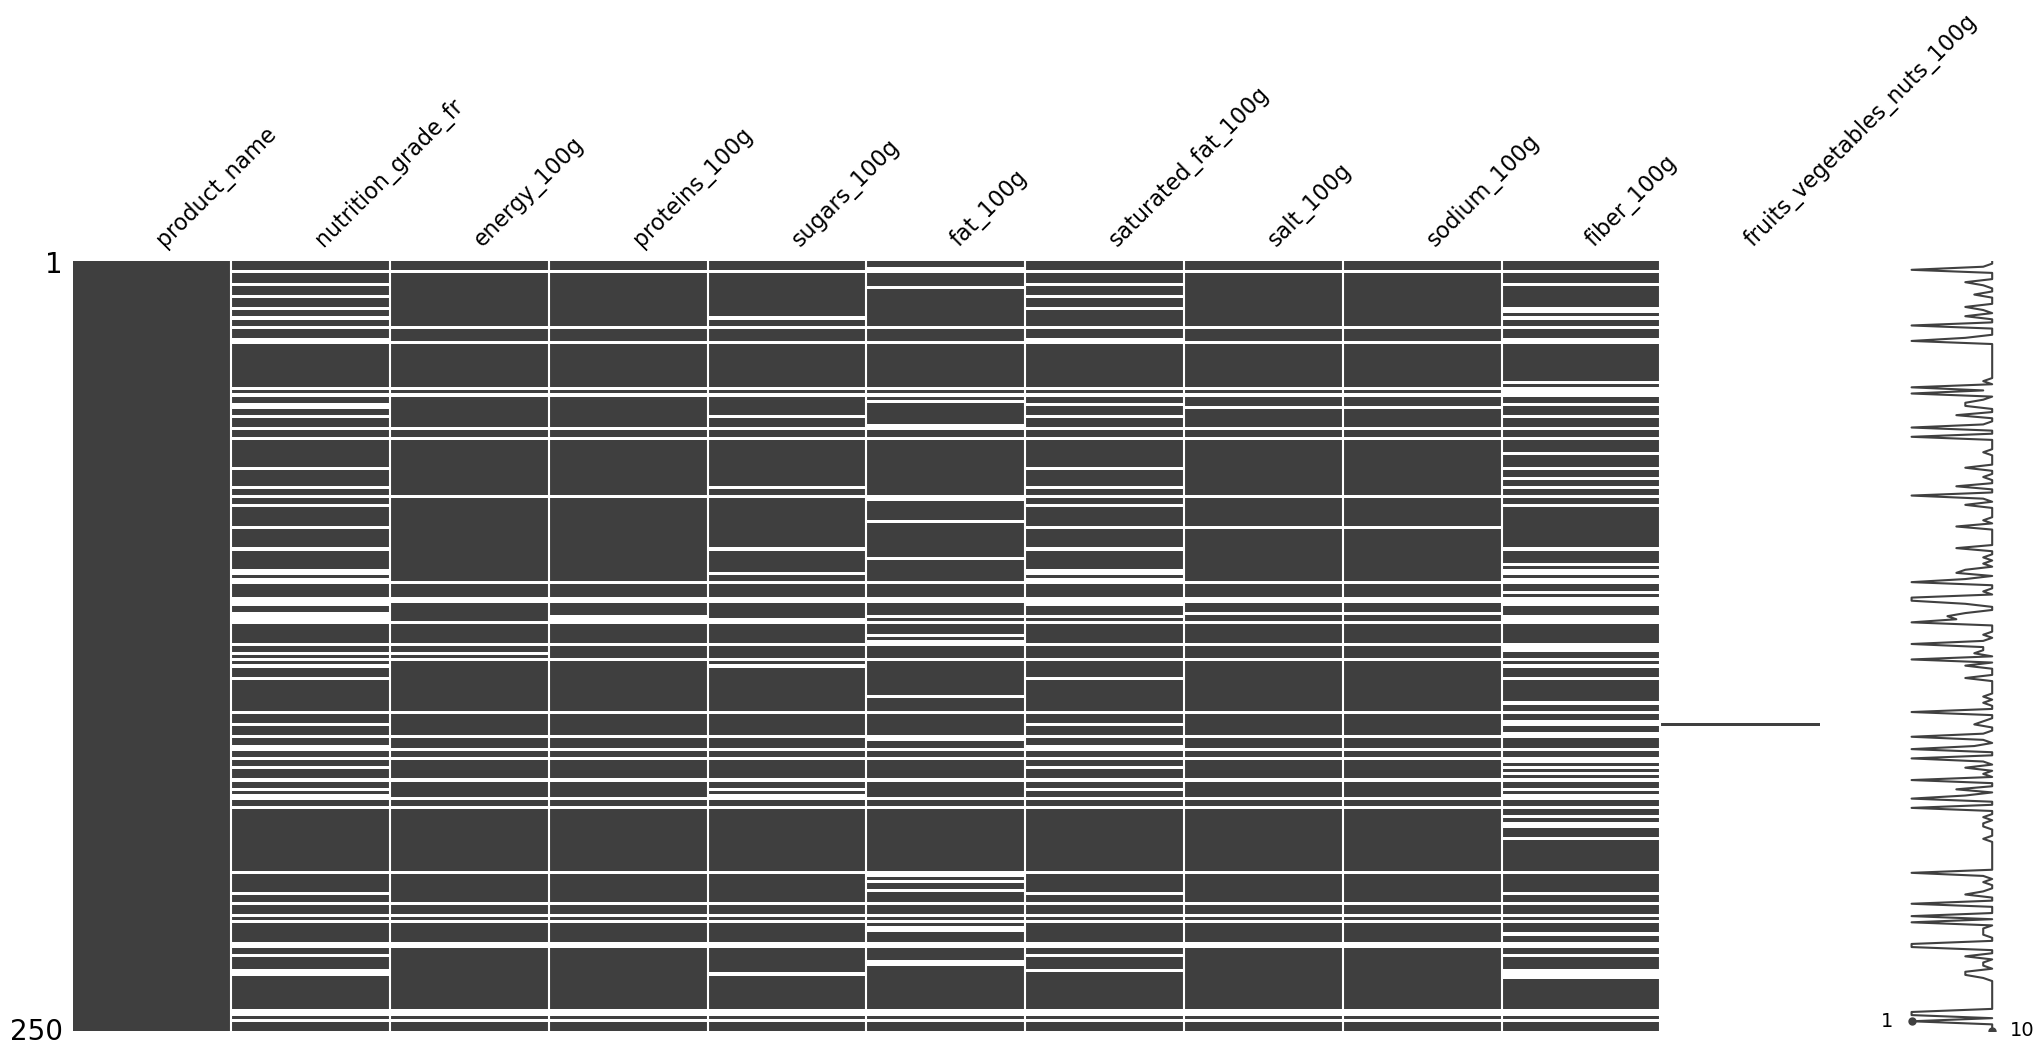

In [393]:
import missingno as msno
%matplotlib inline
msno.matrix(new_df.sample(250))

In [394]:
#on supprime les individus lorsque aucune donnée n'est renseigné dans les paramètres
#on affiche le pourcentage de suppression
df_index_drop = []
for i in new_df.itertuples():
    if pd.isna(i.energy_100g)\
    & pd.isna(i.proteins_100g)\
    & pd.isna(i.sugars_100g)\
    & pd.isna(i.fat_100g)\
    & pd.isna(i.salt_100g)\
    & pd.isna(i.sodium_100g)\
    & pd.isna(i.fiber_100g)\
    & pd.isna(i.saturated_fat_100g)\
    & pd.isna(i.fruits_vegetables_nuts_100g)\
    & pd.isna(i.nutrition_grade_fr):
        df_index_drop.append(i.Index)
        
len_list = len(df_index_drop)
print(round(len_list/len(new_df)*100, 2))
df = new_df.drop(df_index_drop).copy()

14.36


<Axes: >

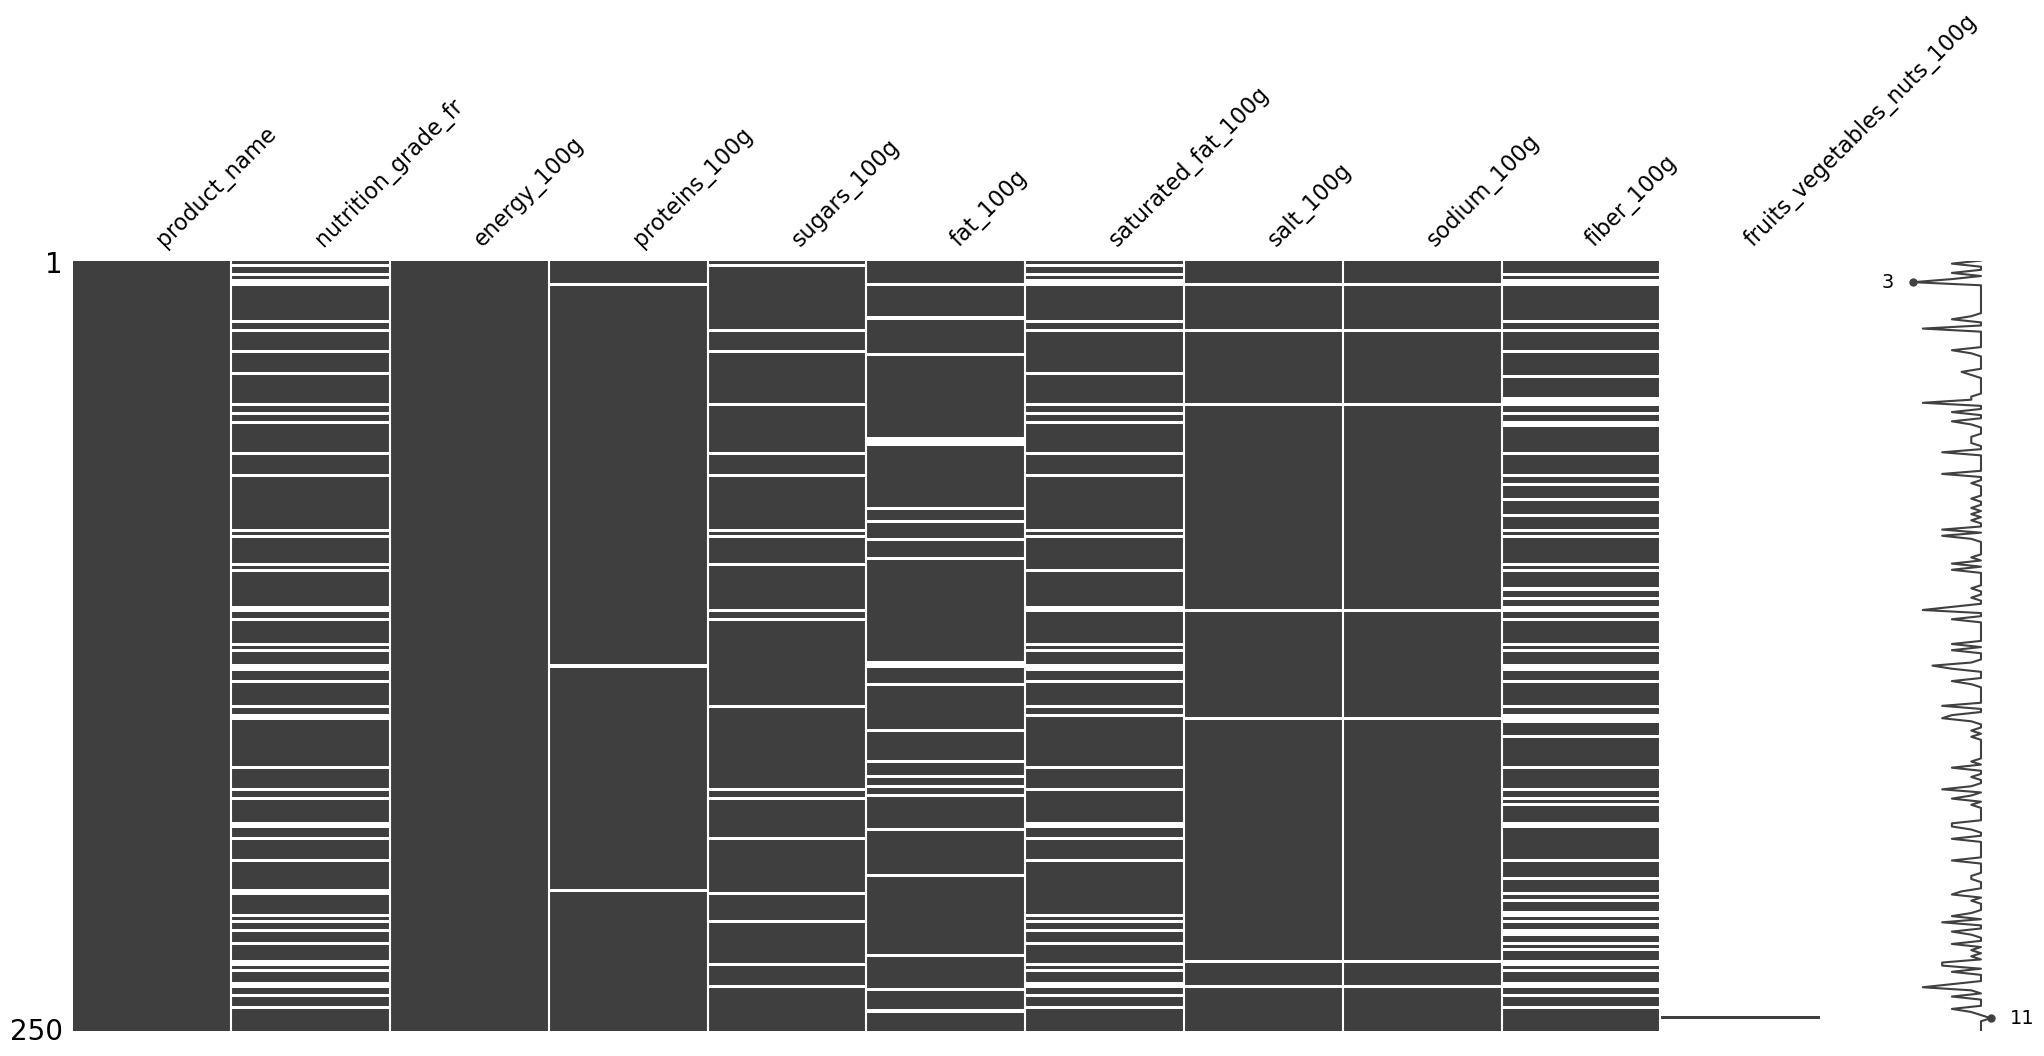

In [395]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250))

In [396]:
df_index_drop = []
for i in df.itertuples():
    if pd.isna(i.energy_100g)\
    | pd.isna(i.proteins_100g)\
    | pd.isna(i.sugars_100g)\
    | pd.isna(i.fat_100g)\
    | pd.isna(i.salt_100g)\
    | pd.isna(i.sodium_100g)\
    | pd.isna(i.fiber_100g)\
    | pd.isna(i.saturated_fat_100g)\
    | pd.isna(i.fruits_vegetables_nuts_100g)\
    | pd.isna(i.nutrition_grade_fr):
        df_index_drop.append(i.Index)
        
df_without_Nan = df.drop(df_index_drop).copy()

<Axes: >

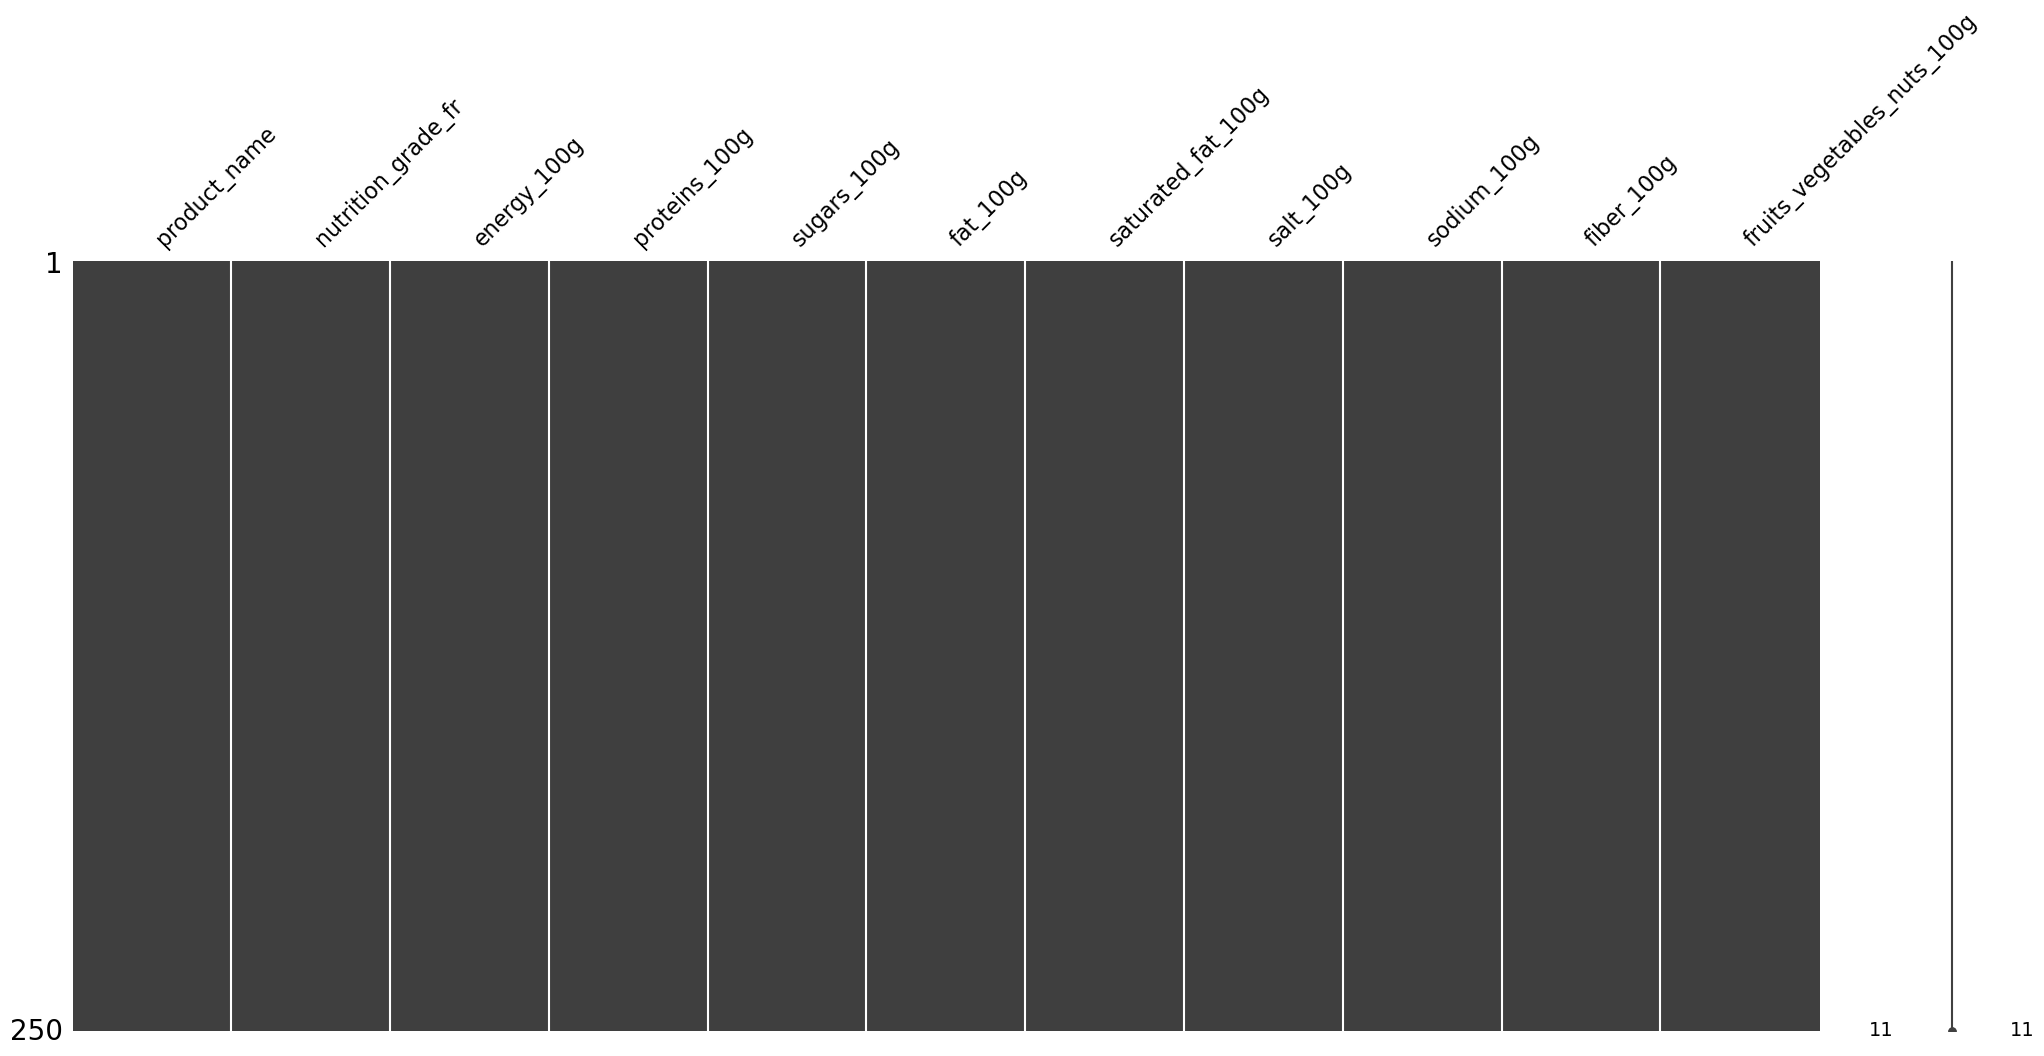

In [397]:
msno.matrix(df_without_Nan.sample(250))

In [398]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(df_without_Nan["fat_100g"],df_without_Nan["saturated_fat_100g"])[0])
print(np.cov(df_without_Nan["fat_100g"],df_without_Nan["saturated_fat_100g"],ddof=0)[1,0])

0.7527124231665546
52.69713819247117


/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_43961/2176917812.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_without_Nan.corr()


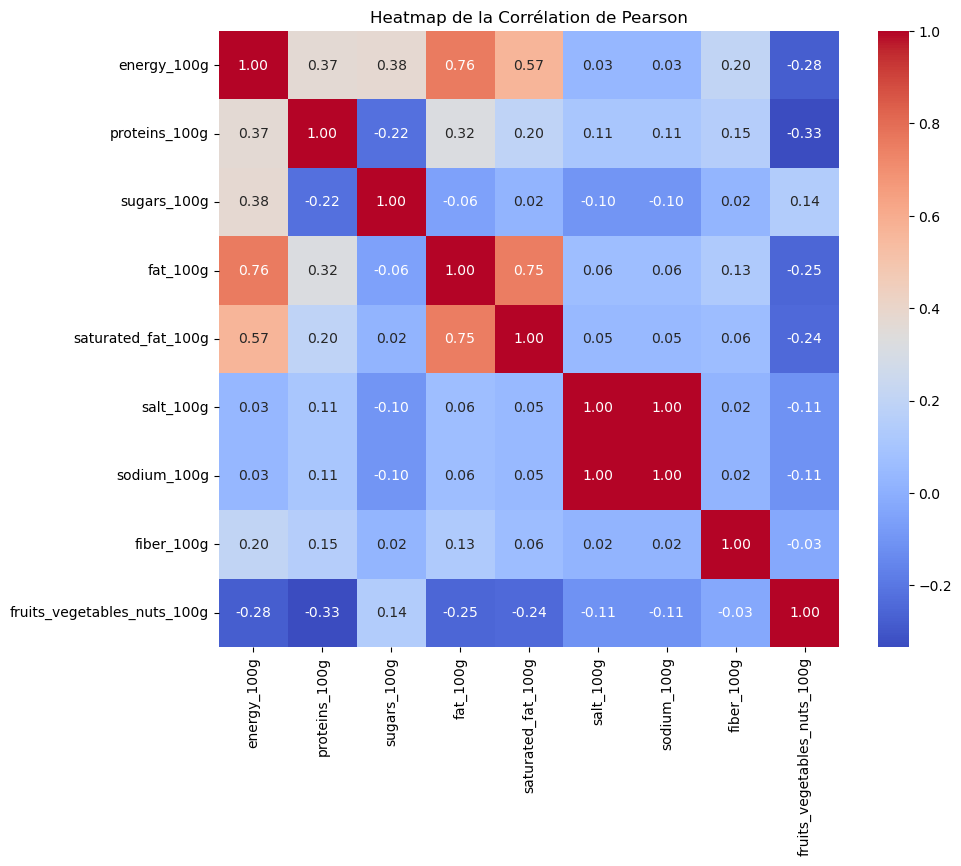

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_without_Nan.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la Corrélation de Pearson')
plt.show()


In [400]:
#on constate une corrélation entre le salt et le sodium
#entre fat et satured fat
#egalement entre energy et fat a voir ??????

<Axes: >

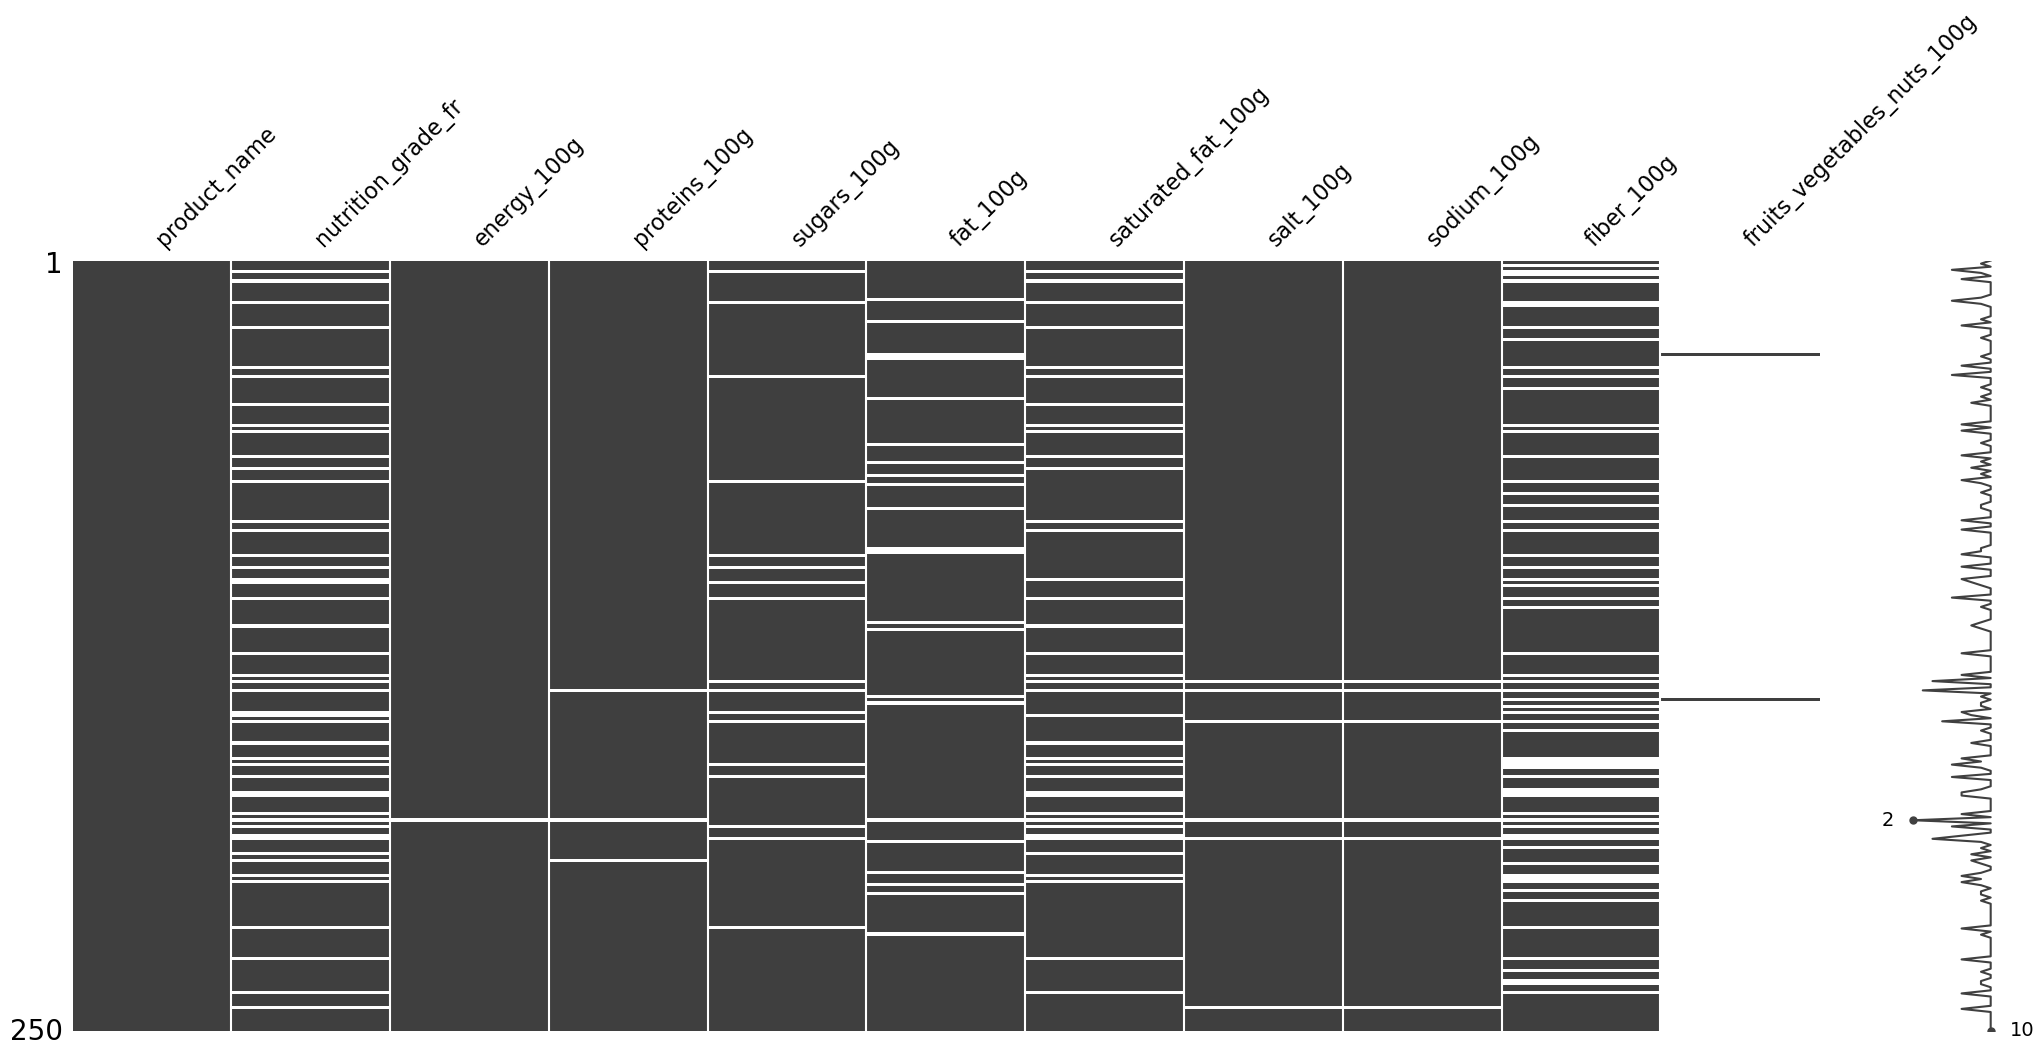

In [401]:
msno.matrix(df.sample(250))

<Axes: >

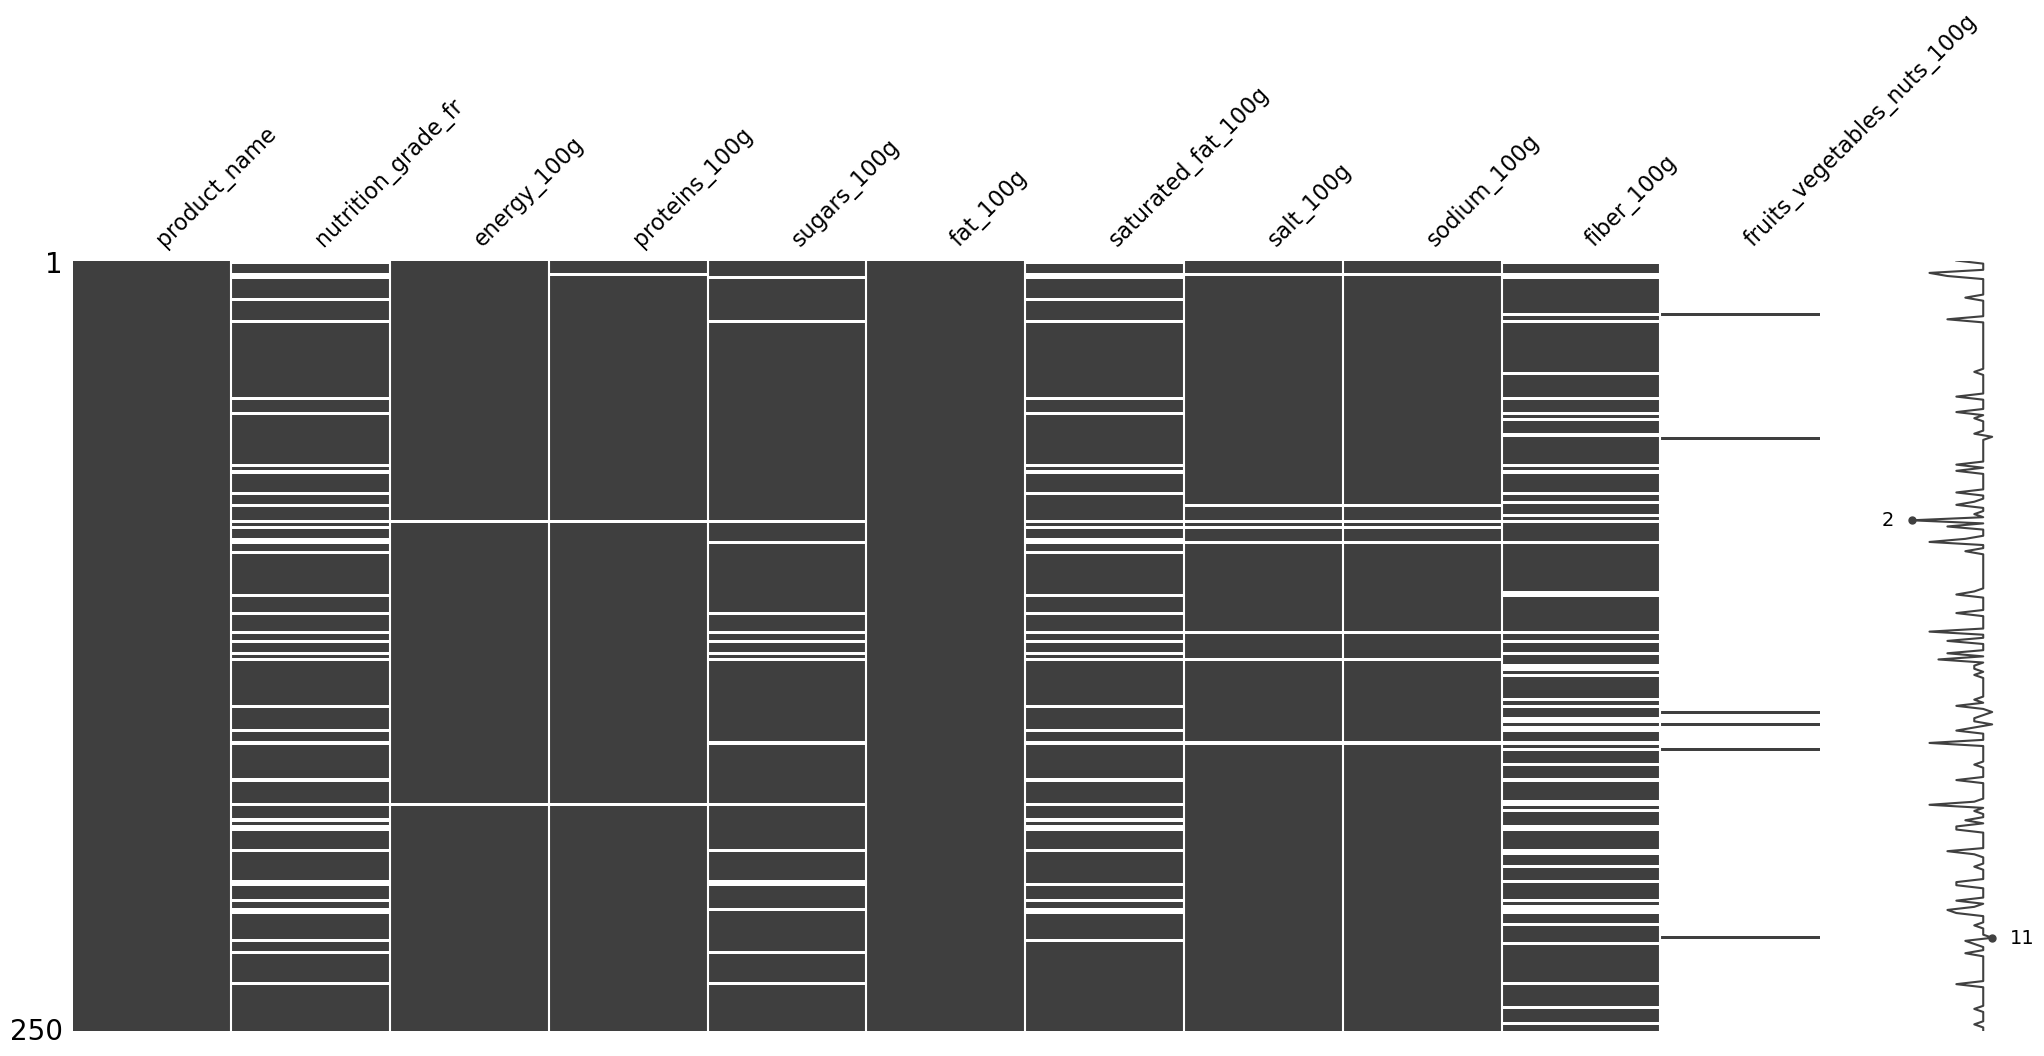

In [402]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df['fat_100g'] = imputer.fit_transform(df[['fat_100g', 'saturated_fat_100g']])[:, 0]

msno.matrix(df.sample(250))

<Axes: >

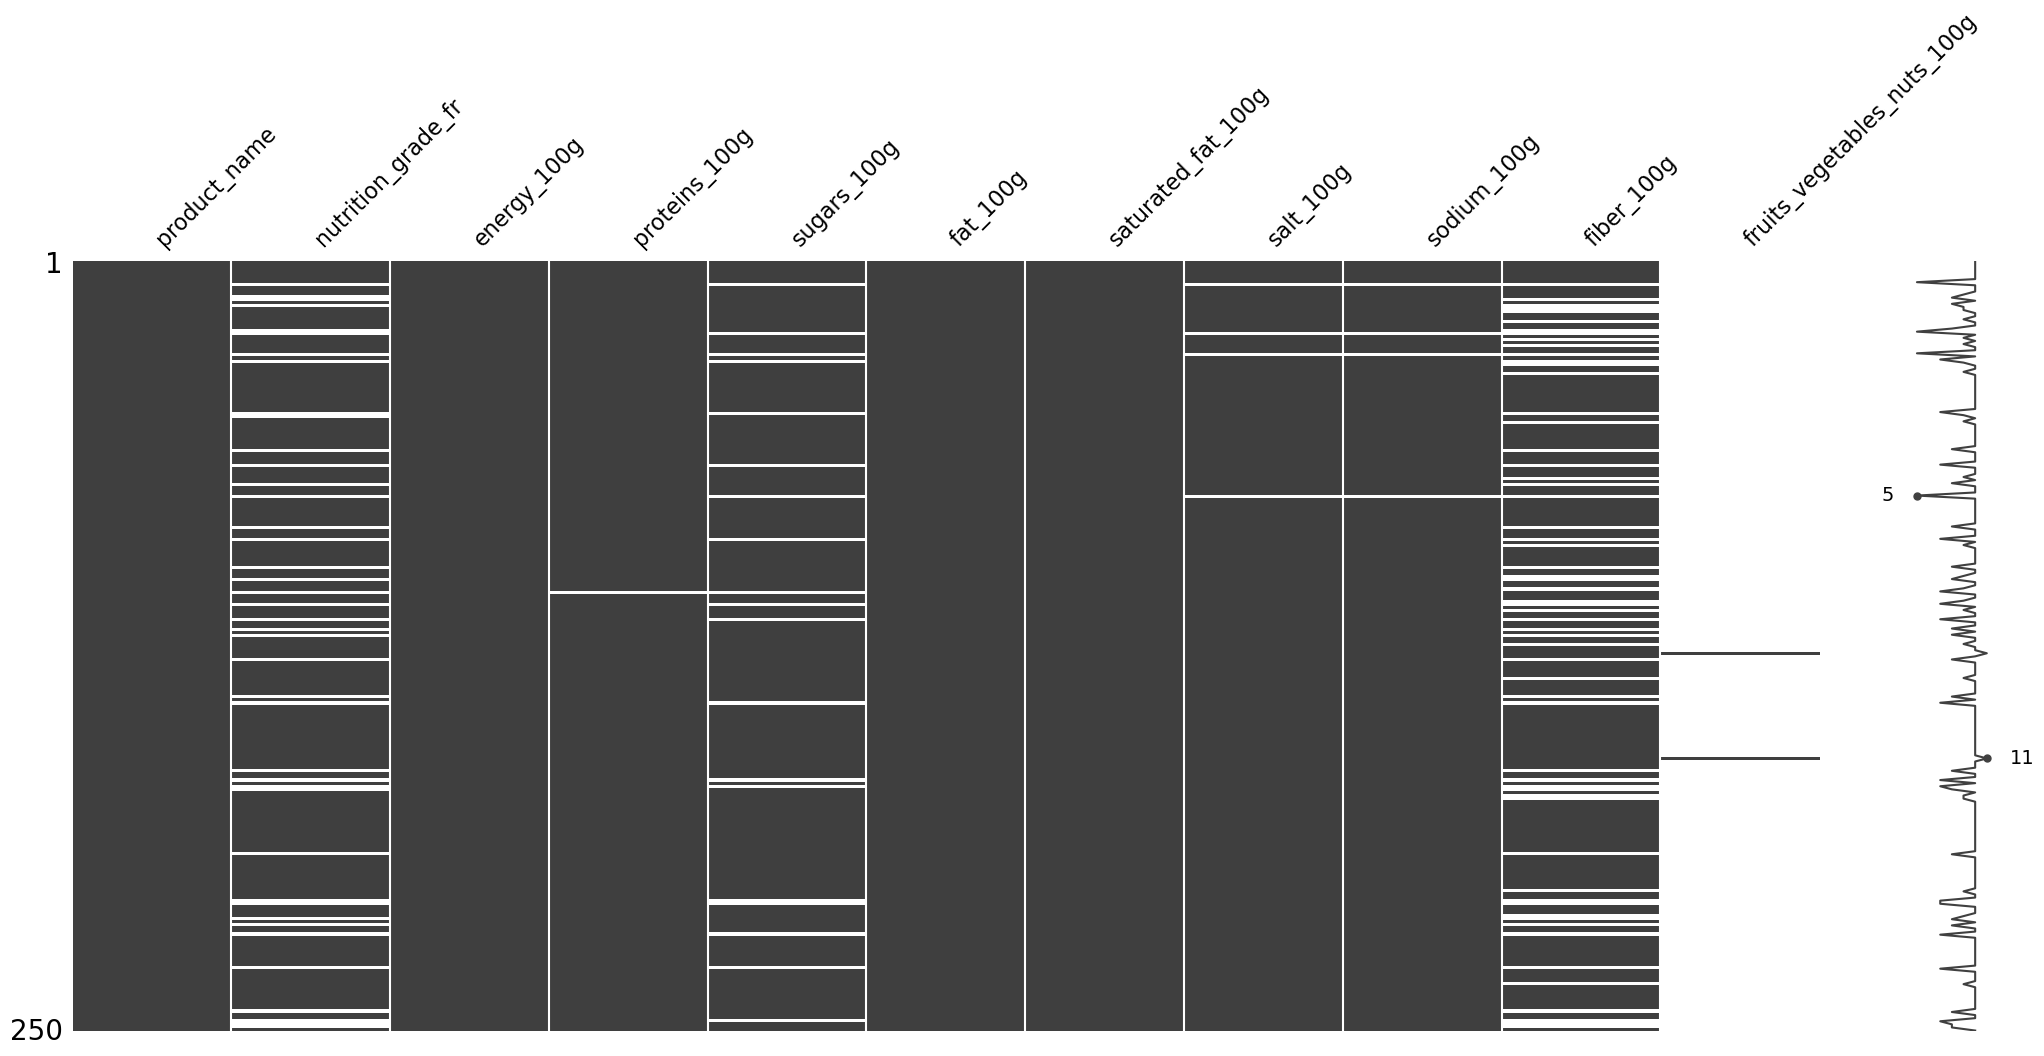

In [403]:
df['saturated_fat_100g'] = imputer.fit_transform(df[['saturated_fat_100g', 'fat_100g']])[:, 0]

msno.matrix(df.sample(250))

<Axes: >

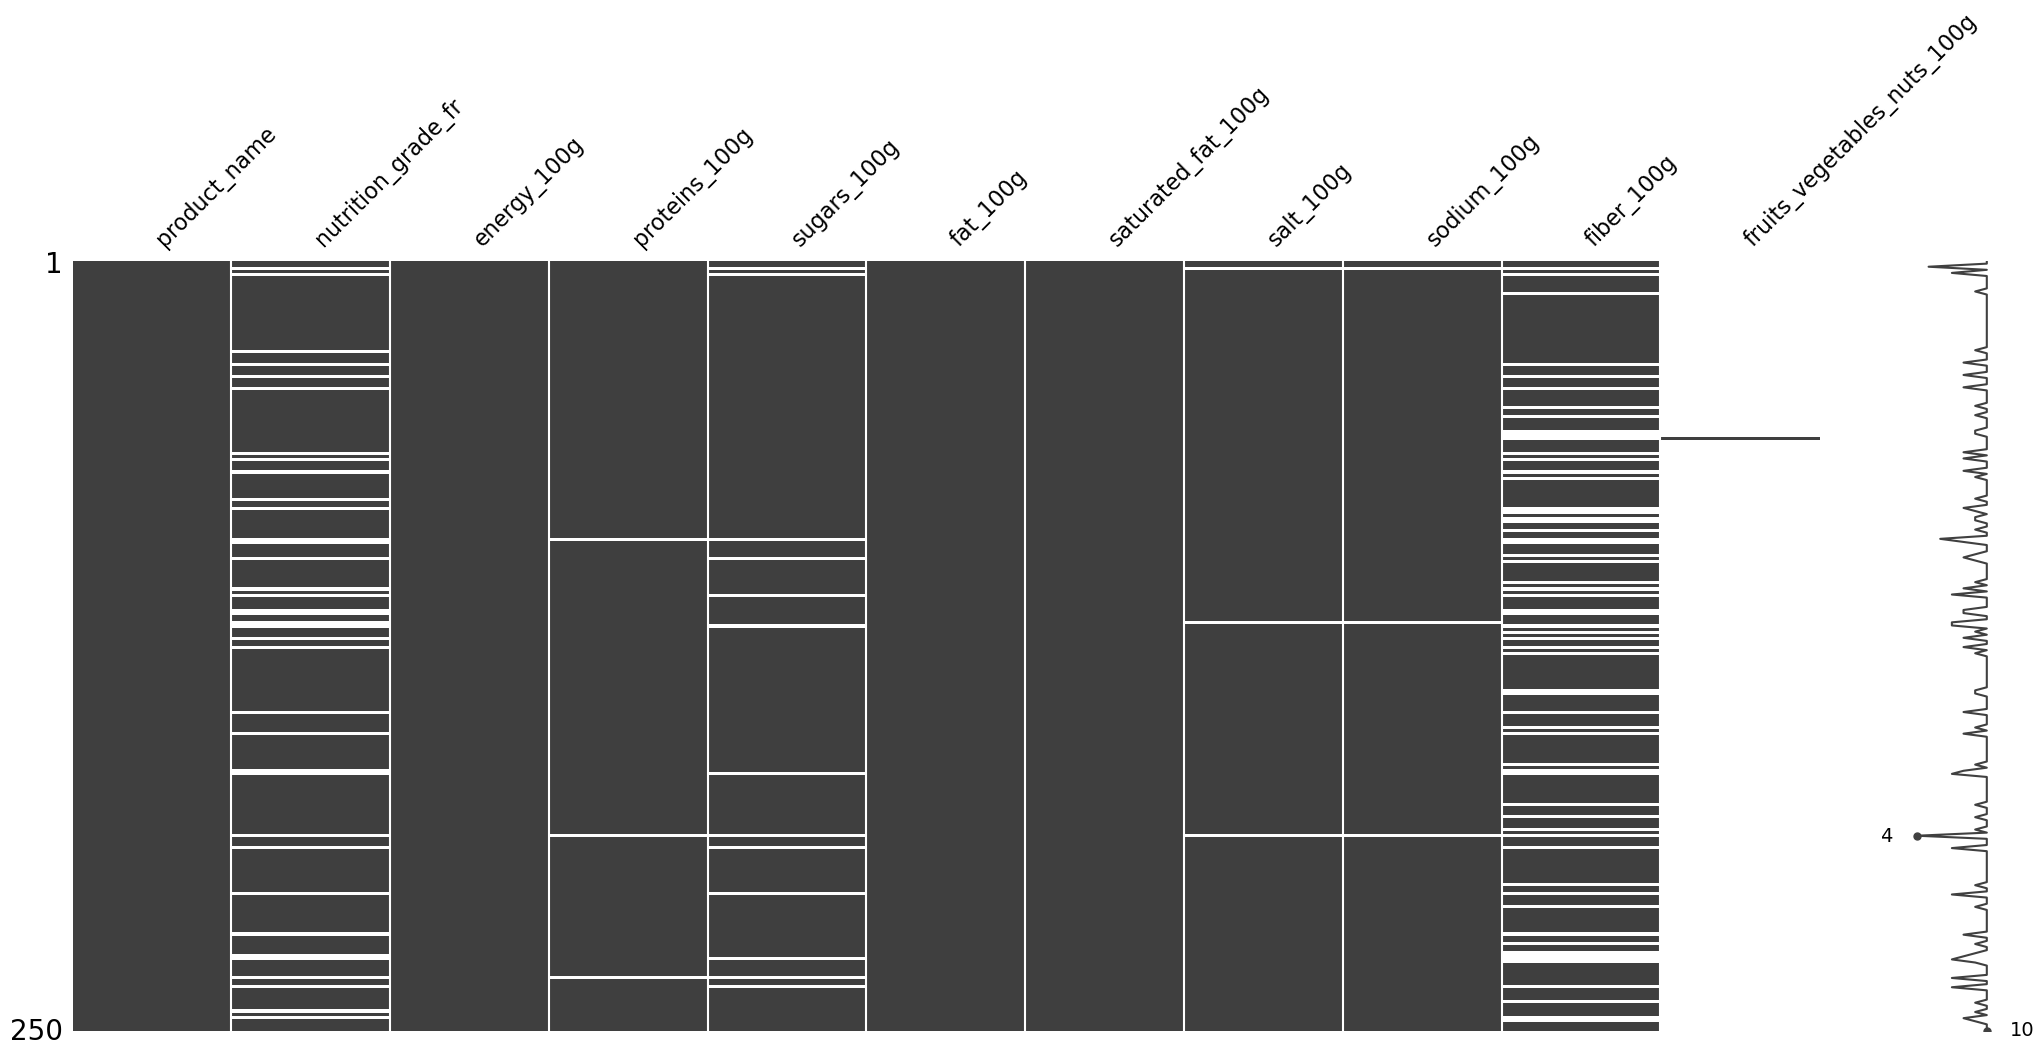

In [404]:
df['energy_100g'] = imputer.fit_transform(df[['energy_100g', 'fat_100g']])[:, 0]

msno.matrix(df.sample(250))

In [405]:
Nan_values = df.isnull().sum()
total_values = len(df)
Nan_values_percentage = (Nan_values / total_values) * 100
Nan_values_percentage = round(Nan_values_percentage, 2)
print(Nan_values_percentage)

product_name                    0.00
nutrition_grade_fr             15.81
energy_100g                     0.00
proteins_100g                   1.11
sugars_100g                     6.78
fat_100g                        0.00
saturated_fat_100g              0.00
salt_100g                       2.69
sodium_100g                     2.70
fiber_100g                     23.47
fruits_vegetables_nuts_100g    98.83
dtype: float64


In [406]:
#on supprime les données manquantes pour les paramètres
#proteins 1%
#sugars 6%
#salt = sodium 3%

In [407]:
index_null_value = df[df['proteins_100g'].isnull()].index
df.drop(index_null_value , inplace=True)
index_null_value = df[df['sugars_100g'].isnull()].index
df.drop(index_null_value , inplace=True)
index_null_value = df[df['salt_100g'].isnull()].index
df.drop(index_null_value , inplace=True)
index_null_value = df[df['sodium_100g'].isnull()].index
df.drop(index_null_value , inplace=True)
Nan_value = df.isnull().sum()
total_values = len(df)
Nan_values_percentage = (Nan_values / total_values) * 100
Nan_values_percentage = round(Nan_values_percentage, 2)
print(Nan_values_percentage)

product_name                     0.00
nutrition_grade_fr              17.12
energy_100g                      0.00
proteins_100g                    1.20
sugars_100g                      7.34
fat_100g                         0.00
saturated_fat_100g               0.00
salt_100g                        2.91
sodium_100g                      2.92
fiber_100g                      25.41
fruits_vegetables_nuts_100g    107.01
dtype: float64


<Axes: >

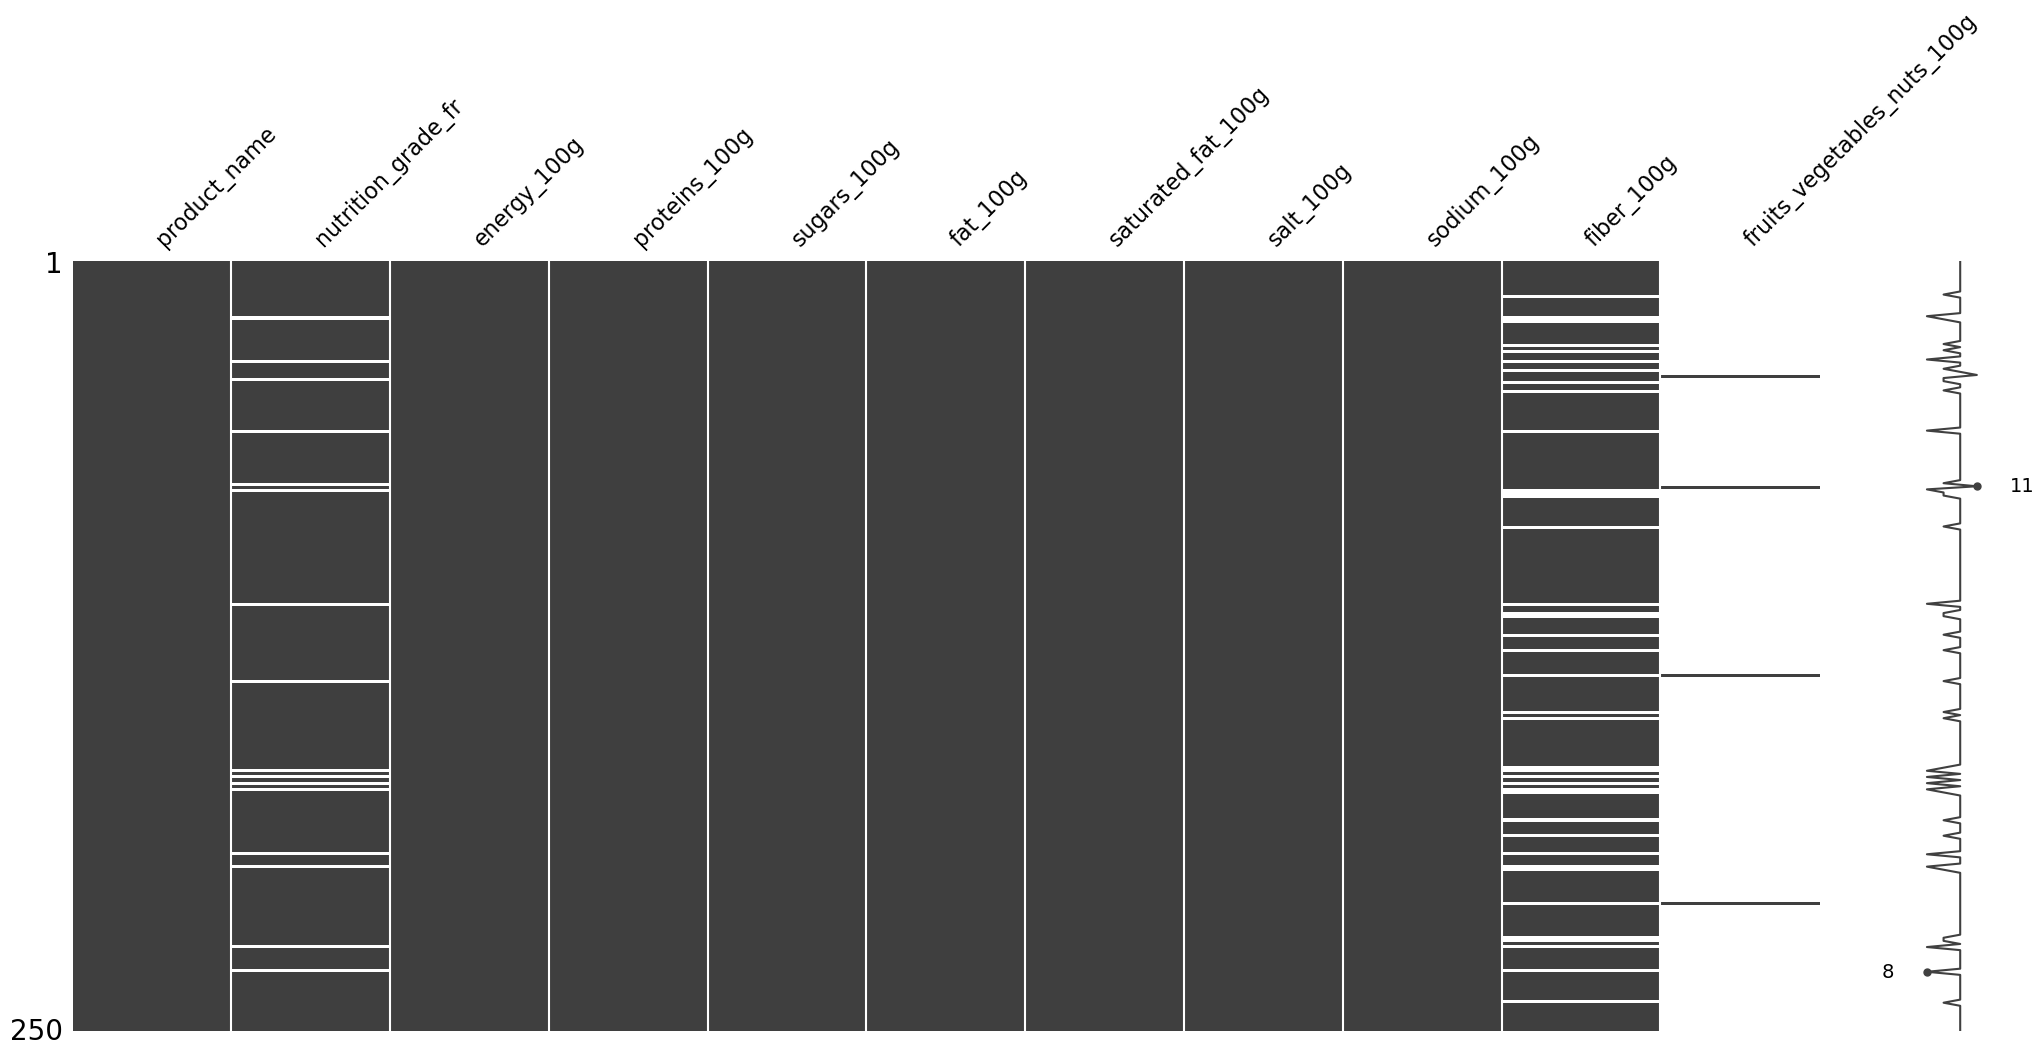

In [408]:
msno.matrix(df.sample(250))

In [409]:
df.shape

(239665, 11)

In [410]:
df[df['fruits_vegetables_nuts_100g'].notnull()]['fruits_vegetables_nuts_100g'].mean()

30.27746911401341

In [411]:
#remplacer les valeurs null par un zéro
df['fruits_vegetables_nuts_100g'] = df['fruits_vegetables_nuts_100g'].fillna(0)

<Axes: >

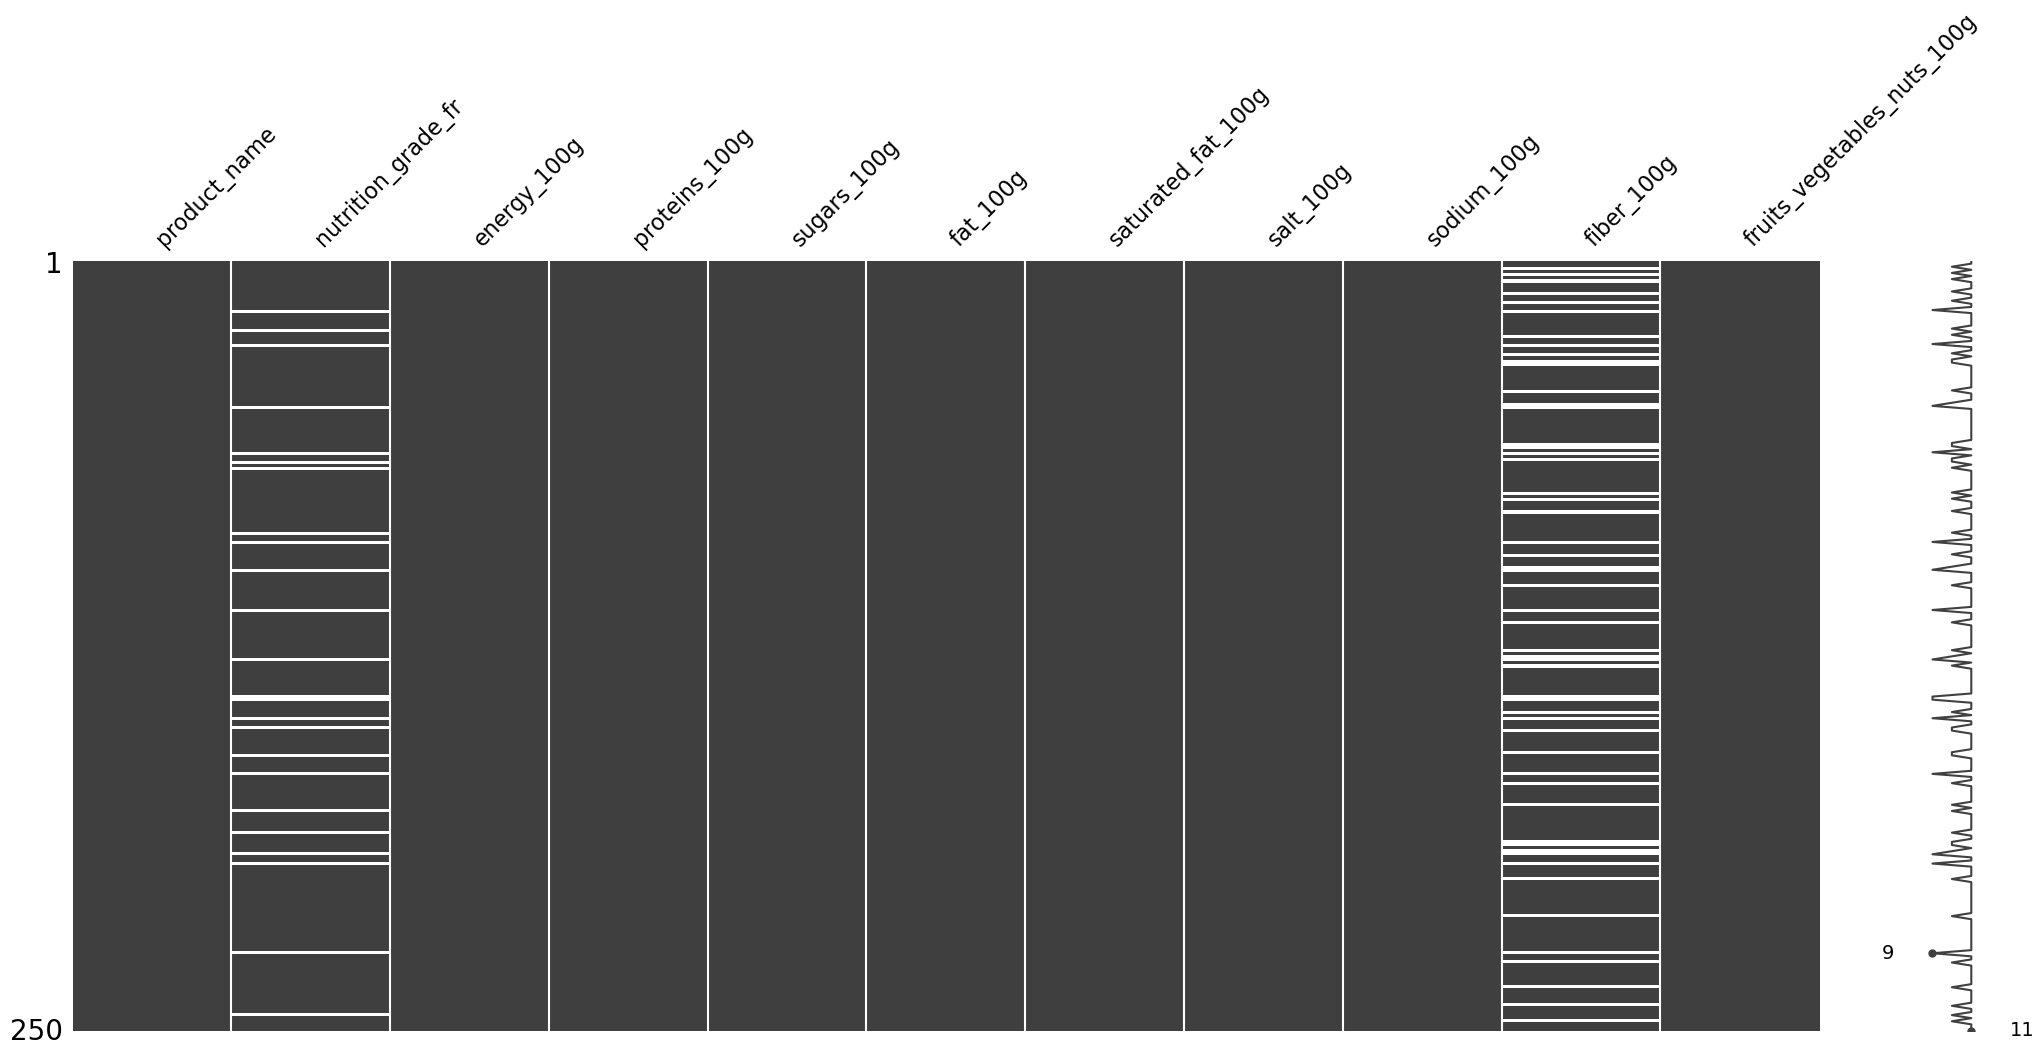

In [412]:
msno.matrix(df.sample(250))

<Axes: >

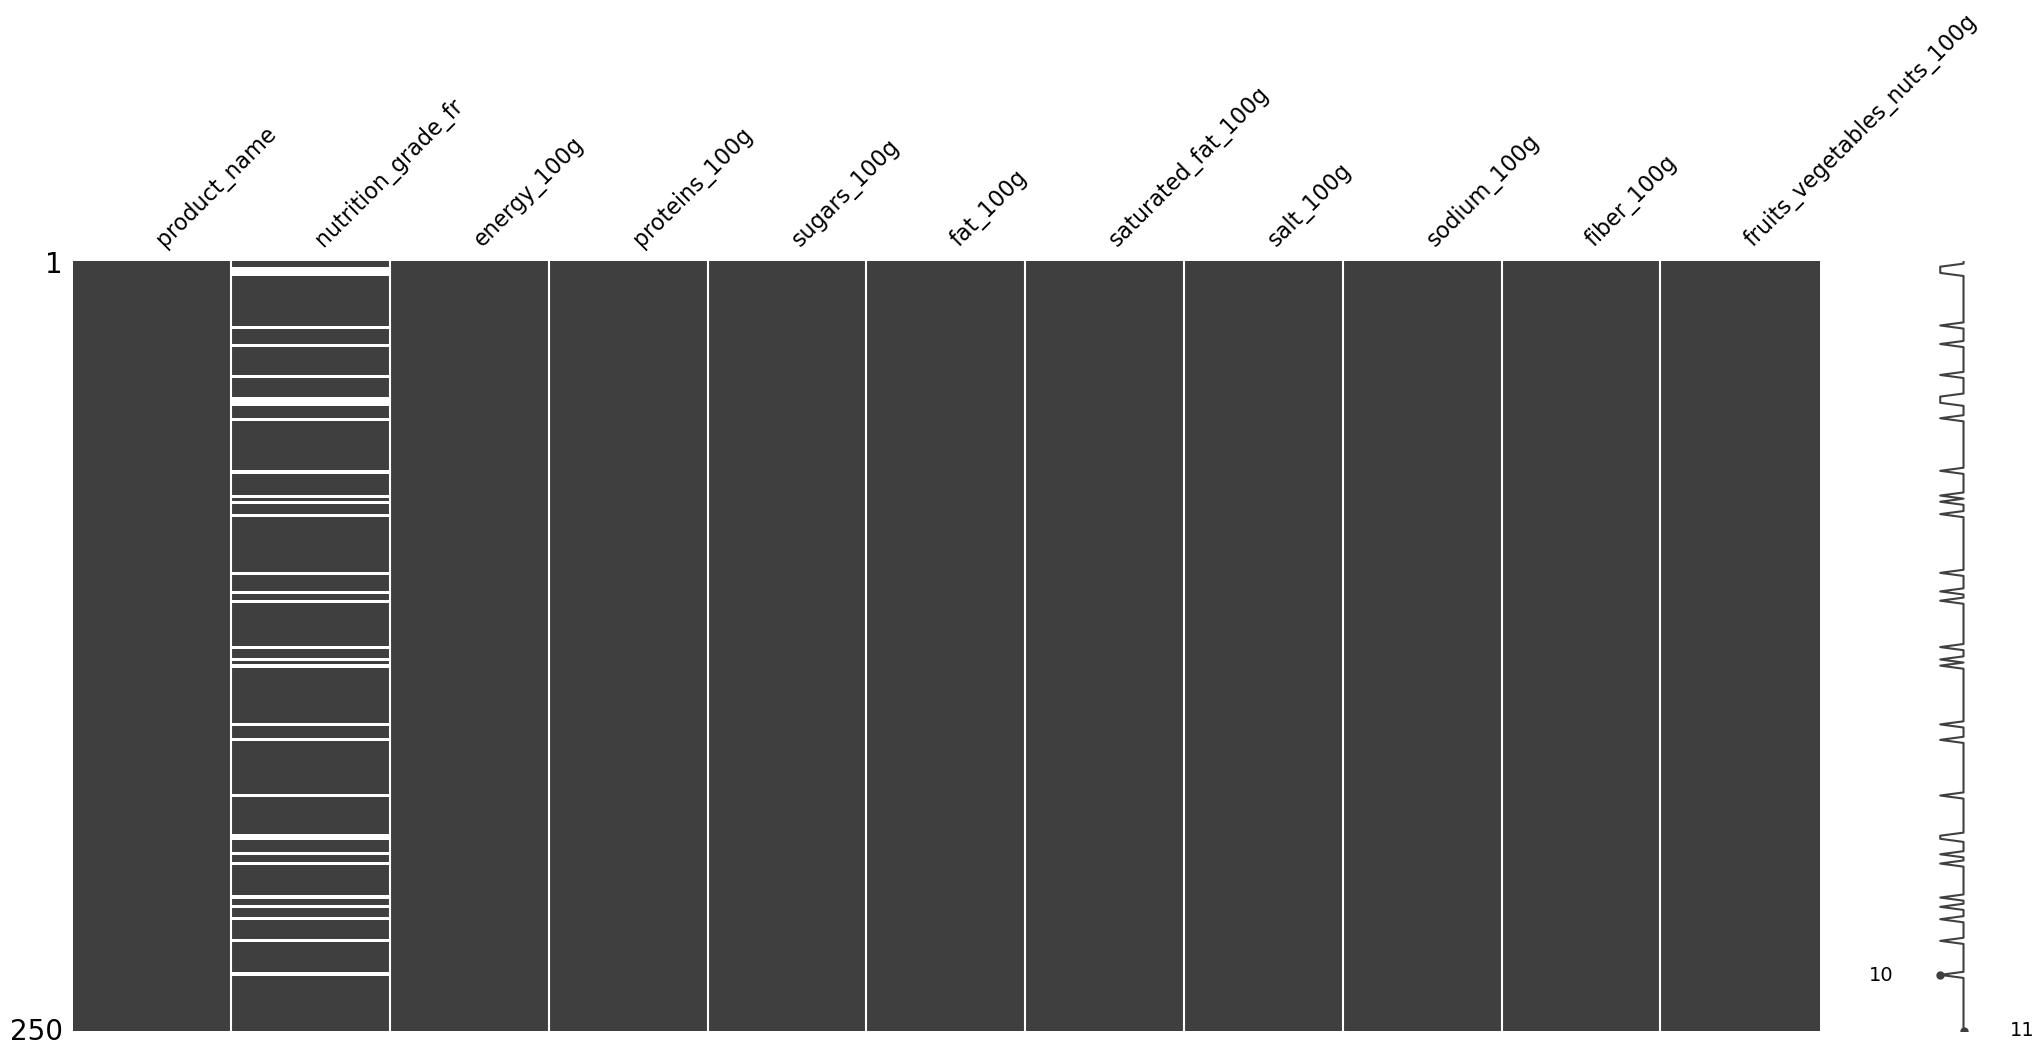

In [413]:
median_fiber = df[df['fiber_100g'].notnull()]['fiber_100g'].median()
df['fiber_100g'] = df['fiber_100g'].fillna(median_fiber)
msno.matrix(df.sample(250))

In [414]:
df.isnull().sum()

product_name                       0
nutrition_grade_fr             21388
energy_100g                        0
proteins_100g                      0
sugars_100g                        0
fat_100g                           0
saturated_fat_100g                 0
salt_100g                          0
sodium_100g                        0
fiber_100g                         0
fruits_vegetables_nuts_100g        0
dtype: int64

In [415]:
import pandas as pd
import numpy as np
from numpy import nan

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#tools for testing our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [416]:
df_index_drop = []
for i in df.itertuples():
    if pd.isna(i.nutrition_grade_fr):
        df_index_drop.append(i.Index)
        
df_without_Nan = df.drop(df_index_drop).copy()

In [417]:
df_without_Nan.shape

(218277, 11)

In [418]:
df_sample = df_without_Nan.sample(50000, replace=False)

In [419]:
X = df_sample.iloc[:, 2:11]#toute la ligne de la 2eme à la 7eme colonne
y = df_sample.iloc[:, 1]#c'est la réponse et donc on veut la 2eme colonne
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
#on garde 20% pour le test plus tard

In [420]:
#mise à l'échelle des données
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

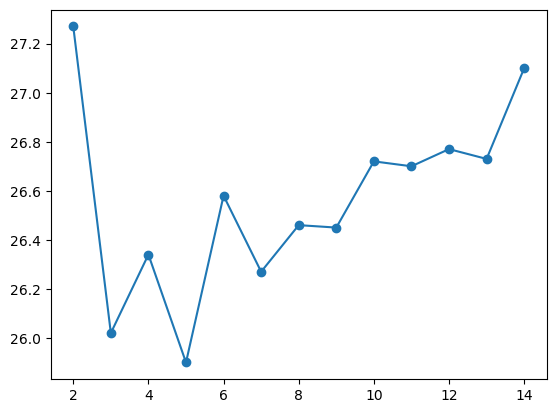

In [421]:
errors = []
for k in range(2,15):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [422]:
X = df_without_Nan.iloc[:, 2:11]#toute la ligne de la 2eme à la 7eme colonne
y = df_without_Nan.iloc[:, 1]#c'est la réponse et donc on veut la 2eme colonne
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
#on garde 20% pour le test plus tard

In [423]:
#mise à l'échelle des données
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [424]:
#Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

In [425]:
#fit model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [426]:
y_pred = classifier.predict(X_test)
y_pred

array(['d', 'd', 'c', ..., 'a', 'd', 'd'], dtype=object)

In [427]:
print(accuracy_score(y_test, y_pred))

0.797301630932747


In [428]:
#on doit refite notre modèle sur les valeurs qu'on veut retrouver

In [429]:
X = df_without_Nan.iloc[:, 2:11]#toute la ligne de la 2eme à la 7eme colonne
y = df_without_Nan.iloc[:, 1]#c'est la réponse et donc on veut la 2eme colonne

In [430]:
#mise à l'échelle des données
X_train = X
y_train = y
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

In [431]:
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

In [432]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [433]:
X_test = df.iloc[:, 2:11]
values_predicted = classifier.predict(X_test)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [434]:
values_predicted.shape

(239665,)

In [435]:
df.shape

(239665, 11)

In [436]:
values_predicted

array(['e', 'e', 'e', ..., 'e', 'd', 'e'], dtype=object)

In [437]:
values_predicted_serie = pd.Series(values_predicted, index=df.index)
df['nutrition_grade_fr'].fillna(values_predicted_serie, inplace=True)

In [438]:
df.isnull().sum()

product_name                   0
nutrition_grade_fr             0
energy_100g                    0
proteins_100g                  0
sugars_100g                    0
fat_100g                       0
saturated_fat_100g             0
salt_100g                      0
sodium_100g                    0
fiber_100g                     0
fruits_vegetables_nuts_100g    0
dtype: int64

<Axes: >

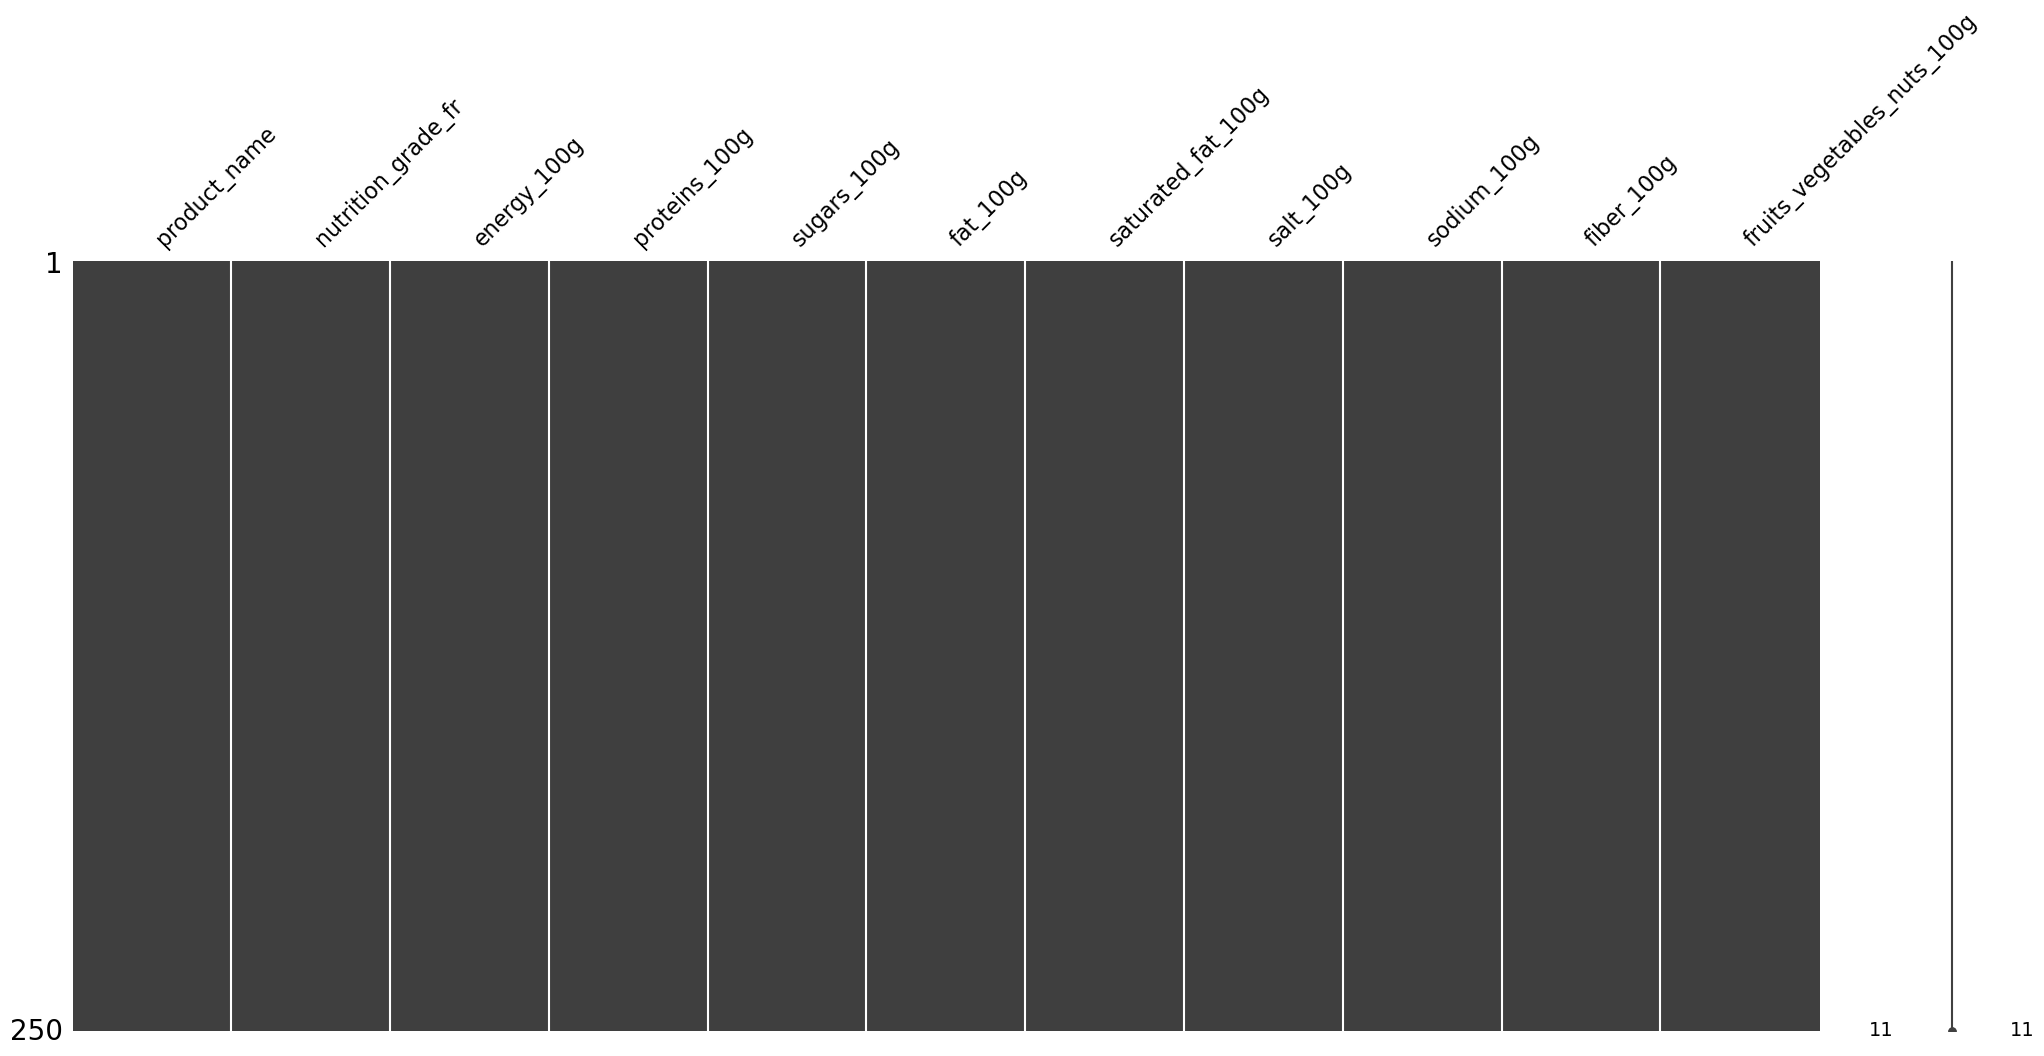

In [439]:
msno.matrix(df.sample(250))

In [440]:
#on supprime les valeurs aberrantes

In [441]:
index_drop_rogue_value = df[df['proteins_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [442]:
index_drop_rogue_value = df[df['sugars_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [443]:
index_drop_rogue_value = df[df['fat_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [444]:
index_drop_rogue_value = df[df['saturated_fat_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [445]:
index_drop_rogue_value = df[df['salt_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [446]:
index_drop_rogue_value = df[df['fiber_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [447]:
index_drop_rogue_value = df[df['proteins_100g'] < 0].index
df.drop(index_drop_rogue_value, inplace=True)

In [448]:
index_drop_rogue_value = df[df['sugars_100g'] < 0].index
df.drop(index_drop_rogue_value, inplace=True)

In [449]:
index_drop_rogue_value = df[df['fiber_100g'] < 0].index
df.drop(index_drop_rogue_value, inplace=True)

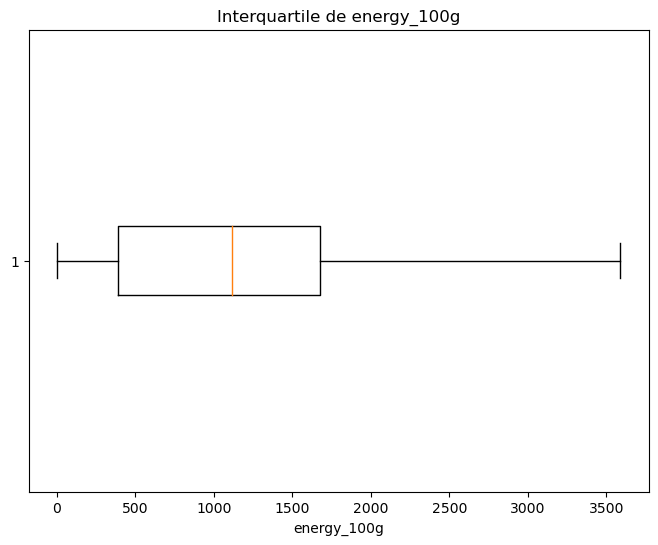

In [450]:
import matplotlib.pyplot as plt
df_energy = pd.DataFrame(df['energy_100g'])
df_temporary = df_energy.dropna().copy()

plt.figure(figsize=(8, 6))
plt.boxplot(df_temporary.values, vert=False, showfliers=False)
plt.xlabel('energy_100g')
plt.title('Interquartile de energy_100g')

plt.show()

In [451]:
#aliment ayant le plus de kilojoules huile d'avocat 3765kj
#on supprime les aliments supérieurs à 3765
index_drop_value = df[df['energy_100g'] > 3765].index
df.drop(index_drop_value, inplace=True)

In [452]:
df.head(50)

,product_name,nutrition_grade_fr,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g,fruits_vegetables_nuts_100g
1,Banana Chips Sweetened (Whole),d,2243.0,3.57,14.29,28.57000,28.570000,0.00000,0.000,3.6,0.0
2,Peanuts,b,1941.0,17.86,17.86,17.86000,0.000000,0.63500,0.250,7.1,0.0
3,Organic Salted Nut Mix,d,2540.0,17.86,3.57,57.14000,5.360000,1.22428,0.482,7.1,0.0
7,Organic Muesli,c,1833.0,14.06,15.62,18.75000,4.690000,0.13970,0.055,9.4,0.0
12,Zen Party Mix,d,2230.0,16.67,3.33,36.67000,5.000000,1.60782,0.633,6.7,0.0
15,Cinnamon Nut Granola,b,1824.0,14.55,21.82,18.18000,1.820000,0.02286,0.009,9.1,0.0
16,Organic Hazelnuts,b,2632.0,14.29,3.57,60.71000,3.570000,0.01016,0.004,10.7,0.0
19,Organic Oat Groats,a,1096.0,16.67,2.38,5.95000,1.190000,0.02540,0.010,9.5,0.0
20,Energy Power Mix,d,1464.0,7.50,32.50,17.50000,7.500000,0.28448,0.112,5.0,0.0
21,Antioxidant Mix - Berries & Chocolate,d,2092.0,13.33,30.00,33.33000,6.670000,0.46482,0.183,6.7,0.0


In [453]:
df.describe()

,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g,fruits_vegetables_nuts_100g
count,239067.000000,239067.000000,239067.000000,239067.000000,239067.000000,239067.000000,239067.000000,239067.000000,239067.000000
mean,1122.024040,7.188893,15.943108,12.168942,4.521423,1.266420,0.498590,2.561600,0.358168
std,759.815723,8.030416,21.103303,15.428731,7.038551,4.307725,1.695944,4.083682,4.788722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,393.000000,0.860000,1.320000,0.120000,0.000000,0.070000,0.027559,0.000000,0.000000
50%,1117.000000,5.000000,5.710000,5.800000,1.200000,0.580000,0.228346,1.500000,0.000000
75%,1674.000000,10.000000,24.000000,20.000000,6.500000,1.320800,0.520000,3.200000,0.000000
max,3762.000000,100.000000,100.000000,100.000000,100.000000,100.000000,39.370079,100.000000,100.000000


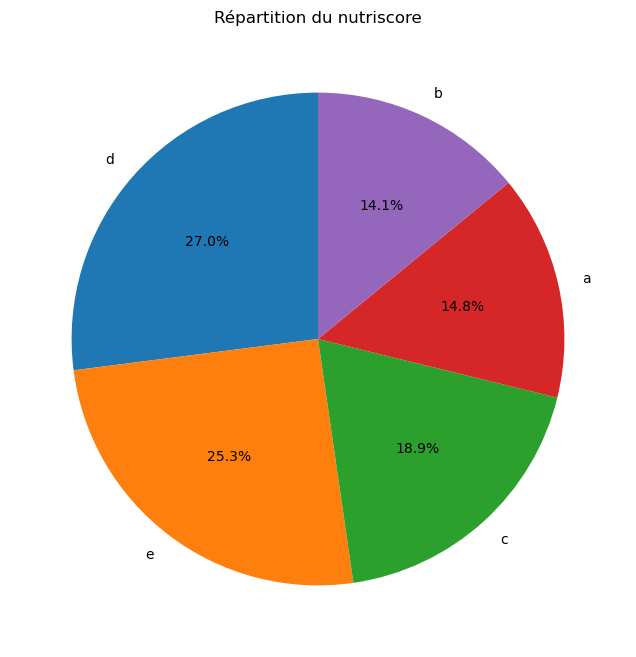

In [454]:
import pandas as pd
import matplotlib.pyplot as plt

values = df['nutrition_grade_fr'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)

plt.title('Répartition du nutriscore')
plt.show()


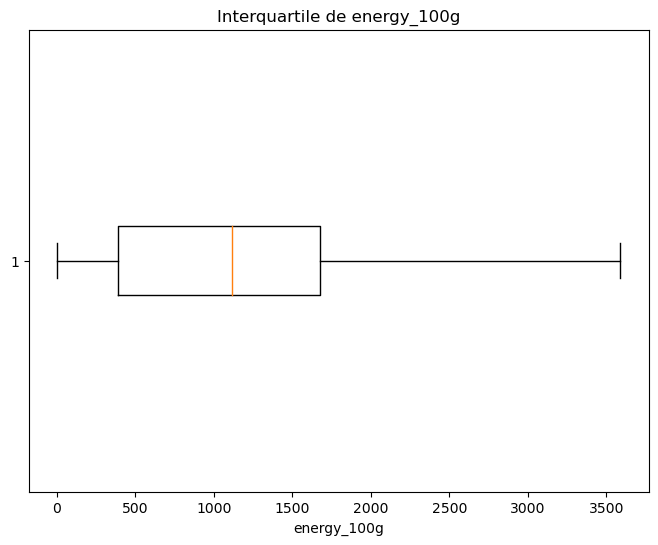

In [455]:
import matplotlib.pyplot as plt
df_energy = pd.DataFrame(df['energy_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_energy.values, vert=False, showfliers=False)
plt.xlabel('energy_100g')
plt.title('Interquartile de energy_100g')

plt.show()

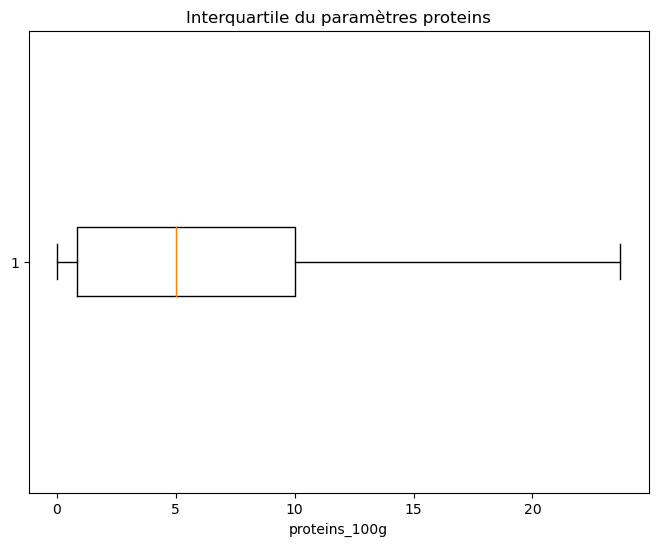

In [456]:
import matplotlib.pyplot as plt
df_proteins = pd.DataFrame(df['proteins_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_proteins.values, vert=False, showfliers=False)
plt.xlabel('proteins_100g')
plt.title('Interquartile du paramètres proteins')

plt.show()

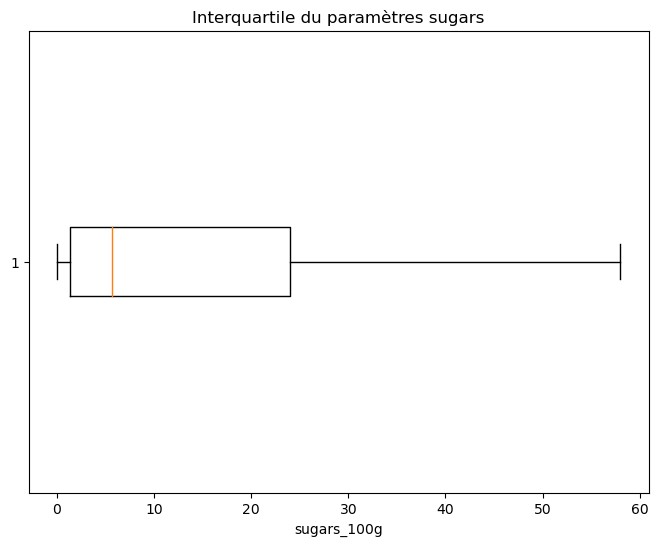

In [457]:
import matplotlib.pyplot as plt
df_sugars = pd.DataFrame(df['sugars_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_sugars.values, vert=False, showfliers=False)
plt.xlabel('sugars_100g')
plt.title('Interquartile du paramètres sugars')

plt.show()

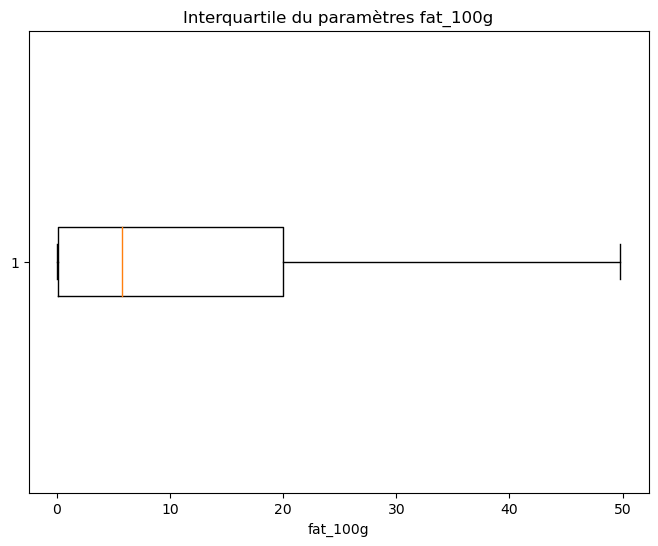

In [458]:
import matplotlib.pyplot as plt
df_fat = pd.DataFrame(df['fat_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_fat.values, vert=False, showfliers=False)
plt.xlabel('fat_100g')
plt.title('Interquartile du paramètres fat_100g')

plt.show()

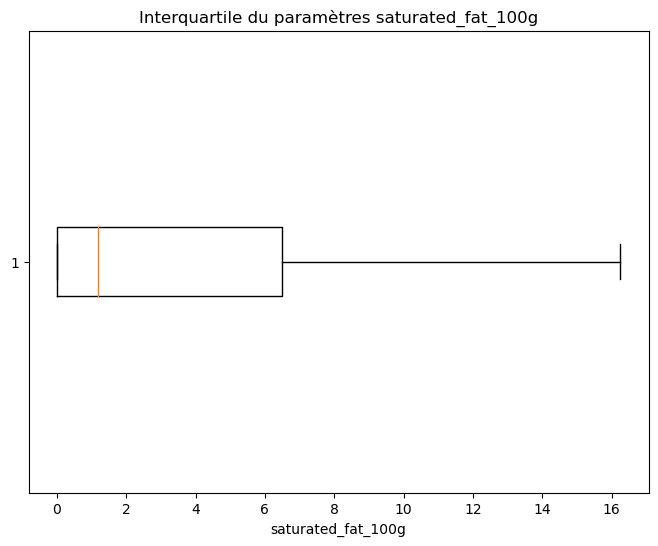

In [459]:
import matplotlib.pyplot as plt
df_saturated_fat = pd.DataFrame(df['saturated_fat_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_saturated_fat.values, vert=False, showfliers=False)
plt.xlabel('saturated_fat_100g')
plt.title('Interquartile du paramètres saturated_fat_100g')

plt.show()

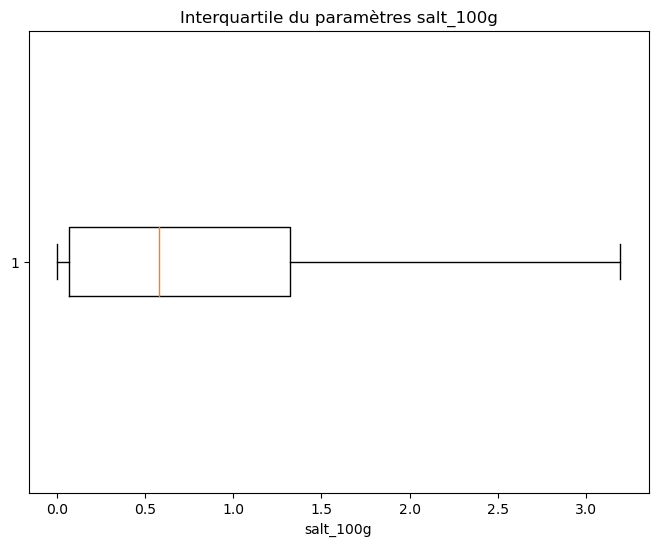

In [460]:
import matplotlib.pyplot as plt
df_salt = pd.DataFrame(df['salt_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_salt.values, vert=False, showfliers=False)
plt.xlabel('salt_100g')
plt.title('Interquartile du paramètres salt_100g')

plt.show()

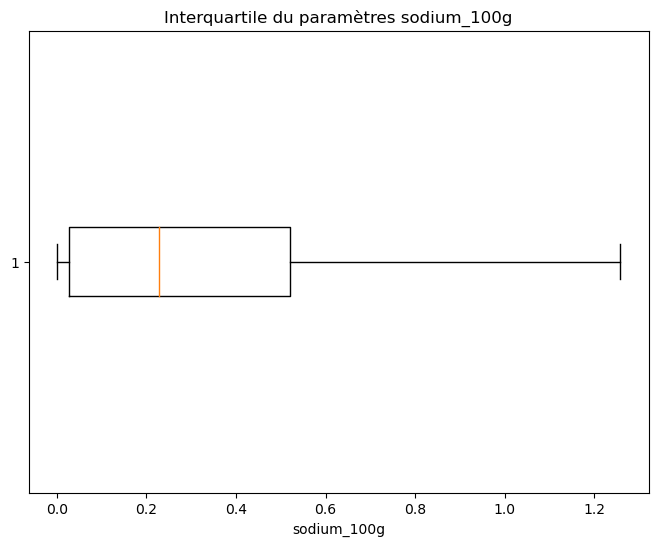

In [461]:
import matplotlib.pyplot as plt
df_sodium = pd.DataFrame(df['sodium_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_sodium.values, vert=False, showfliers=False)
plt.xlabel('sodium_100g')
plt.title('Interquartile du paramètres sodium_100g')

plt.show()

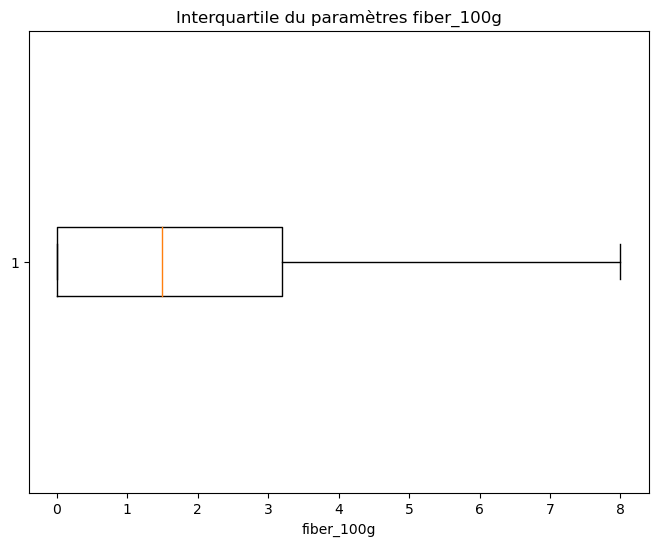

In [462]:
import matplotlib.pyplot as plt
df_fiber = pd.DataFrame(df['fiber_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_fiber.values, vert=False, showfliers=False)
plt.xlabel('fiber_100g')
plt.title('Interquartile du paramètres fiber_100g')

plt.show()

/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_43961/3668096534.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


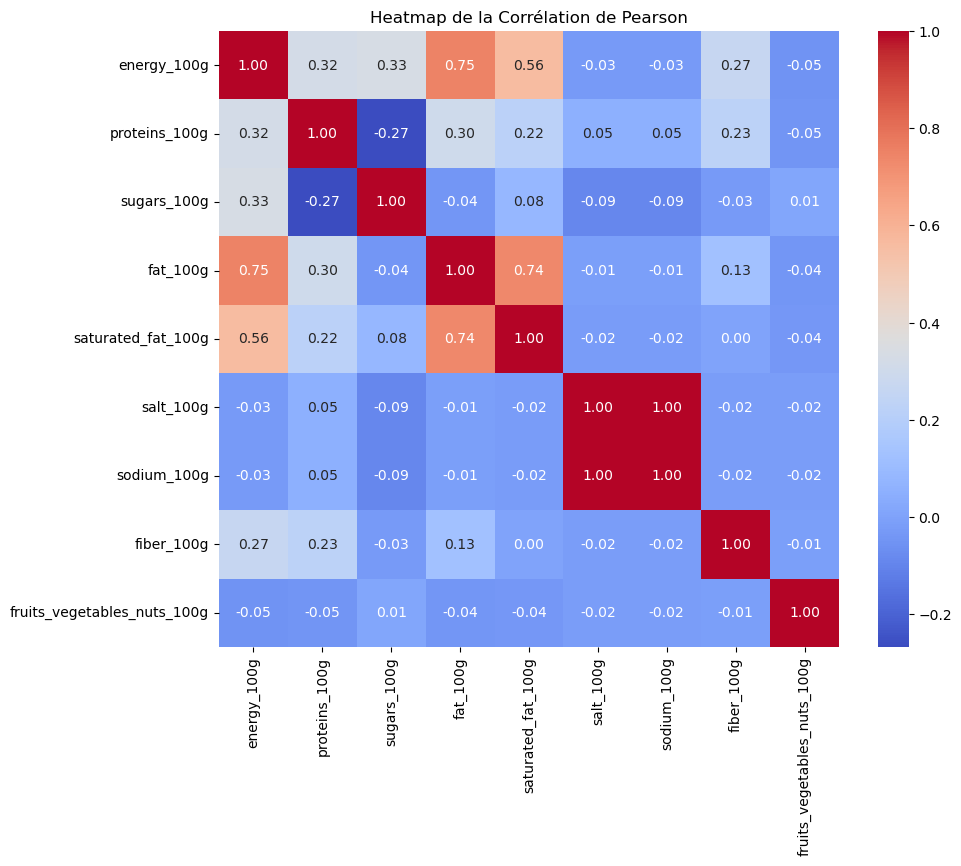

In [463]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la Corrélation de Pearson')
plt.show()

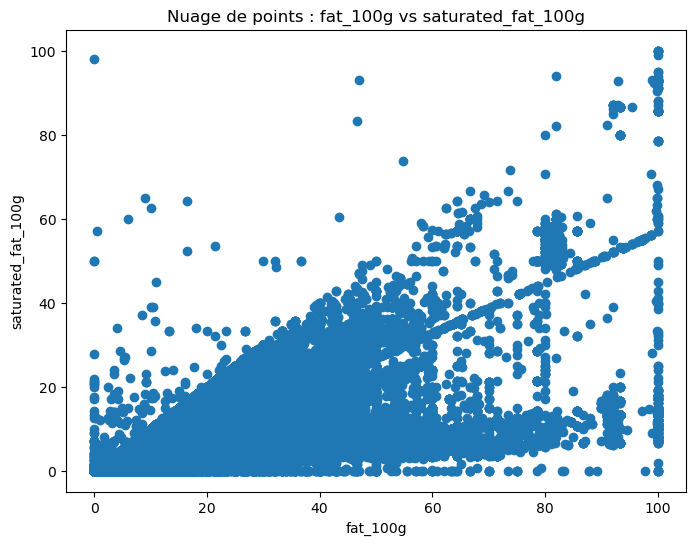

In [464]:
plt.figure(figsize=(8, 6))
plt.scatter(df['fat_100g'], df['saturated_fat_100g'])
plt.xlabel('fat_100g')
plt.ylabel('saturated_fat_100g')
plt.title('Nuage de points : fat_100g vs saturated_fat_100g')

plt.show()

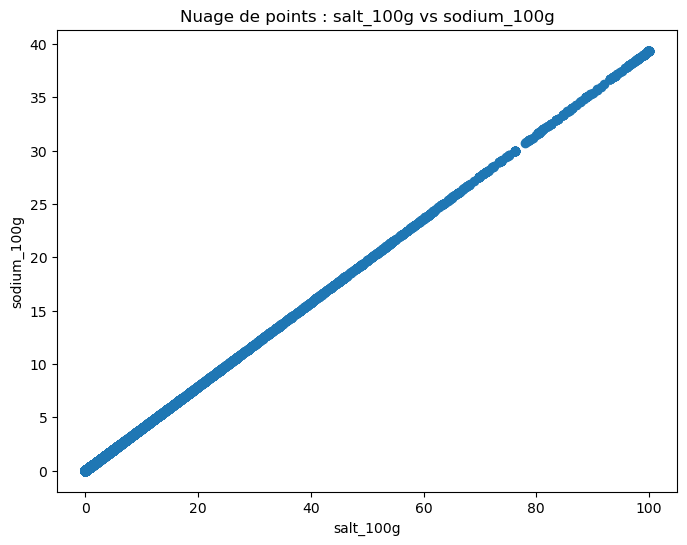

In [465]:
plt.figure(figsize=(8, 6))
plt.scatter(df['salt_100g'], df['sodium_100g'])
plt.xlabel('salt_100g')
plt.ylabel('sodium_100g')
plt.title('Nuage de points : salt_100g vs sodium_100g')

plt.show()

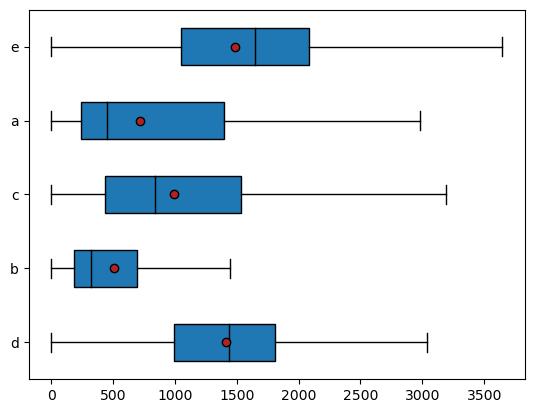

In [466]:
X = "nutrition_grade_fr" # qualitative
Y = "energy_100g" # quantitative

sous_echantillon = df

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [467]:
df.head(5)

,product_name,nutrition_grade_fr,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g,fruits_vegetables_nuts_100g
1,Banana Chips Sweetened (Whole),d,2243.0,3.57,14.29,28.57,28.57,0.00000,0.000,3.6,0.0
2,Peanuts,b,1941.0,17.86,17.86,17.86,0.00,0.63500,0.250,7.1,0.0
3,Organic Salted Nut Mix,d,2540.0,17.86,3.57,57.14,5.36,1.22428,0.482,7.1,0.0
7,Organic Muesli,c,1833.0,14.06,15.62,18.75,4.69,0.13970,0.055,9.4,0.0
12,Zen Party Mix,d,2230.0,16.67,3.33,36.67,5.00,1.60782,0.633,6.7,0.0


In [468]:
df.set_index('product_name', inplace=True)

In [469]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [470]:
# Transformer les grades en variables binaires (one-hot encoding)
grades_dummies = pd.get_dummies(df['nutrition_grade_fr'], prefix='nutrition_grade_fr')
df_PCA = pd.concat([df, grades_dummies], axis=1)
df_PCA.drop('nutrition_grade_fr', axis=1, inplace=True)

In [471]:
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_PCA)

In [472]:
#On espère avoir une moyenne à 0 et un écart type à 1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
mean,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [475]:
#on travaille sur les 6 premières composantes
n_components = 13

In [476]:
#on instancie notre ACP
pca = PCA(n_components=n_components)

In [477]:
#on entraine nos données sur les données scalé(standardisé)
pca.fit(X_scaled)

PCA(n_components=13)

In [478]:
#Intéressons nous maintenant à la variance captée par chaque nouvelle composante. 
#Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_
pca.explained_variance_ratio_

array([2.17302075e-01, 1.47322606e-01, 1.20632664e-01, 9.70501495e-02,
       8.98100837e-02, 8.53998108e-02, 7.09108745e-02, 6.41273825e-02,
       4.59916833e-02, 3.18361928e-02, 2.14475474e-02, 8.16892989e-03,
       1.05233396e-09])

In [479]:
#on enregistre dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([21.73, 14.73, 12.06,  9.71,  8.98,  8.54,  7.09,  6.41,  4.6 ,
        3.18,  2.14,  0.82,  0.  ])

In [480]:
#la fonction cumsum : somme cumulé
scree_cum = scree.cumsum().round()
scree_cum

array([ 22.,  36.,  49.,  58.,  67.,  76.,  83.,  89.,  94.,  97.,  99.,
       100., 100.])

In [481]:
#Définisons ensuite une variable avec la liste de nos composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

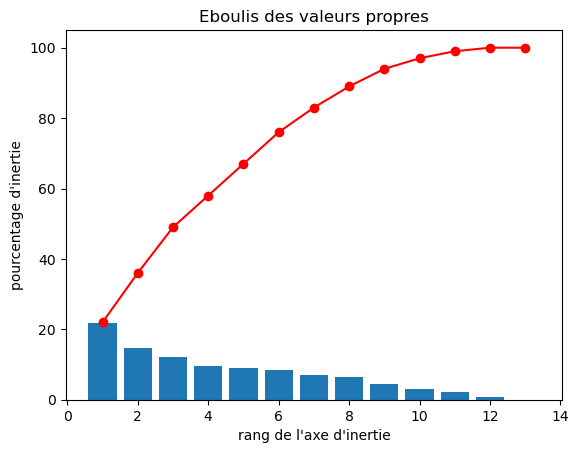

In [482]:
#On peut enfin l'afficher de façon graphique
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)
#On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.
#On voit ici que près de 80% de la variance est comprise dans les 3 premières composantes, 
#et près de 90% dans les 4 premières.

In [483]:
#on obtient les composantes par calcul
#La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs
pcs = pca.components_
pcs

array([[ 4.99436053e-01,  1.97144551e-01,  1.72165607e-01,
         4.87655627e-01,  4.68480460e-01,  4.74506575e-03,
         4.74501130e-03,  8.30484913e-02, -4.46549695e-02,
        -2.02228559e-01, -2.36554044e-01, -1.04774725e-01,
         1.56009616e-01,  2.89253536e-01],
       [-2.49337266e-02,  9.81124615e-02, -1.34970485e-01,
         6.45278556e-03, -2.54963537e-02,  6.83038910e-01,
         6.83039033e-01, -8.38476820e-04, -2.45355641e-02,
        -8.71599748e-02, -7.59967623e-02,  1.27361469e-01,
         6.88588397e-02, -5.31177681e-02],
       [ 1.04262138e-01,  4.80557385e-01, -4.40880444e-01,
         1.54265310e-01, -2.04156772e-02, -8.89965053e-02,
        -8.89963871e-02,  4.46574814e-01, -3.26525058e-02,
         3.64101264e-01, -8.02531450e-02,  1.17294550e-01,
         6.73287101e-02, -4.07389745e-01],
       [-6.76722904e-02,  9.68043012e-02, -2.36865277e-01,
         7.14829263e-02,  1.65391986e-01,  3.16835004e-02,
         3.16831505e-02,  3.54384505e-02, -1.

In [484]:
#Affichons la même chose mais version pandas
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.499436,1.971446e-01,1.721656e-01,4.876556e-01,0.468480,0.004745,0.004745,8.304849e-02,-4.465497e-02,-2.022286e-01,-2.365540e-01,-1.047747e-01,1.560096e-01,2.892535e-01
1,-0.024934,9.811246e-02,-1.349705e-01,6.452786e-03,-0.025496,0.683039,0.683039,-8.384768e-04,-2.453556e-02,-8.715997e-02,-7.599676e-02,1.273615e-01,6.885884e-02,-5.311777e-02
2,0.104262,4.805574e-01,-4.408804e-01,1.542653e-01,-0.020416,-0.088997,-0.088996,4.465748e-01,-3.265251e-02,3.641013e-01,-8.025315e-02,1.172946e-01,6.732871e-02,-4.073897e-01
3,-0.067672,9.680430e-02,-2.368653e-01,7.148293e-02,0.165392,0.031684,0.031683,3.543845e-02,-1.809956e-02,1.876556e-01,7.907963e-02,1.411525e-01,-7.873259e-01,4.611013e-01
4,0.121452,-1.687662e-01,3.900254e-01,-1.510673e-01,-0.186069,-0.015936,-0.015936,2.878462e-01,1.201528e-01,1.083985e-01,-5.836476e-01,5.316748e-01,-1.179740e-01,2.033900e-02
5,-0.018036,-2.091925e-02,1.660443e-01,-1.642209e-01,-0.048723,0.108028,0.108027,1.071874e-01,3.472908e-02,6.091634e-01,-2.559469e-01,-6.457641e-01,6.859824e-02,2.190502e-01
6,-0.022330,2.220503e-02,-1.057058e-01,8.247401e-02,0.084006,0.006649,0.006649,-9.376154e-02,9.817548e-01,5.958739e-03,6.639888e-03,-1.621720e-02,2.321115e-02,-1.929438e-02
7,0.191616,-5.097969e-02,3.171024e-01,-5.381615e-02,-0.143625,0.077775,0.077774,6.714862e-01,1.176795e-01,-1.781614e-01,5.349489e-01,-1.505349e-01,-1.384273e-01,-5.617831e-03
8,-0.015818,7.963051e-01,2.256038e-01,-3.368498e-01,-0.267512,-0.043164,-0.043164,-1.609041e-01,4.778063e-02,-2.197027e-01,-2.997130e-02,-2.071694e-02,2.315208e-03,2.195886e-01
9,-0.408604,-8.996395e-02,-3.896339e-01,-1.393098e-01,0.036481,-0.065052,-0.065052,4.463834e-01,7.340640e-03,-3.908178e-01,-2.722724e-01,-1.045299e-01,2.385181e-01,3.872120e-01


In [486]:
features = df_PCA.columns
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g,fruits_vegetables_nuts_100g,nutrition_grade_fr_a,nutrition_grade_fr_b,nutrition_grade_fr_c,nutrition_grade_fr_d,nutrition_grade_fr_e
F1,0.50,0.20,0.17,0.49,0.47,0.00,0.00,0.08,-0.04,-0.20,-0.24,-0.10,0.16,0.29
F2,-0.02,0.10,-0.13,0.01,-0.03,0.68,0.68,-0.00,-0.02,-0.09,-0.08,0.13,0.07,-0.05
F3,0.10,0.48,-0.44,0.15,-0.02,-0.09,-0.09,0.45,-0.03,0.36,-0.08,0.12,0.07,-0.41
F4,-0.07,0.10,-0.24,0.07,0.17,0.03,0.03,0.04,-0.02,0.19,0.08,0.14,-0.79,0.46
F5,0.12,-0.17,0.39,-0.15,-0.19,-0.02,-0.02,0.29,0.12,0.11,-0.58,0.53,-0.12,0.02
F6,-0.02,-0.02,0.17,-0.16,-0.05,0.11,0.11,0.11,0.03,0.61,-0.26,-0.65,0.07,0.22
F7,-0.02,0.02,-0.11,0.08,0.08,0.01,0.01,-0.09,0.98,0.01,0.01,-0.02,0.02,-0.02
F8,0.19,-0.05,0.32,-0.05,-0.14,0.08,0.08,0.67,0.12,-0.18,0.53,-0.15,-0.14,-0.01
F9,-0.02,0.80,0.23,-0.34,-0.27,-0.04,-0.04,-0.16,0.05,-0.22,-0.03,-0.02,0.00,0.22
F10,-0.41,-0.09,-0.39,-0.14,0.04,-0.07,-0.07,0.45,0.01,-0.39,-0.27,-0.10,0.24,0.39


In [487]:
#on calcule la première composante F1
#F1 = (0.50 * energy_100g) + (0.20 * proteins_100g) + ... 
#et F2
#F2 = (-0.02 * energy_100g) + (0.10 * proteins_100g) + ... 
#on affiche le dataframe
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
energy_100g,0.499436,-0.024934,0.104262,-0.067672,0.121452,-0.018036,-0.022330,0.191616,-0.015818,-0.408604,-0.397867,-0.597240,1.145354e-06
proteins_100g,0.197145,0.098112,0.480557,0.096804,-0.168766,-0.020919,0.022205,-0.050980,0.796305,-0.089964,0.144355,0.127106,1.849364e-07
sugars_100g,0.172166,-0.134970,-0.440880,-0.236865,0.390025,0.166044,-0.105706,0.317102,0.225604,-0.389634,0.310999,0.332883,-9.083896e-07
fat_100g,0.487656,0.006453,0.154265,0.071483,-0.151067,-0.164221,0.082474,-0.053816,-0.336850,-0.139310,-0.288340,0.676565,-4.881392e-07
saturated_fat_100g,0.468480,-0.025496,-0.020416,0.165392,-0.186069,-0.048723,0.084006,-0.143625,-0.267512,0.036481,0.748862,-0.231812,-1.160336e-06
salt_100g,0.004745,0.683039,-0.088997,0.031684,-0.015936,0.108028,0.006649,0.077775,-0.043164,-0.065052,0.018321,0.007972,7.071067e-01
sodium_100g,0.004745,0.683039,-0.088996,0.031683,-0.015936,0.108027,0.006649,0.077774,-0.043164,-0.065052,0.018319,0.007971,-7.071069e-01
fiber_100g,0.083048,-0.000838,0.446575,0.035438,0.287846,0.107187,-0.093762,0.671486,-0.160904,0.446383,0.105298,0.046389,-4.522723e-07
fruits_vegetables_nuts_100g,-0.044655,-0.024536,-0.032653,-0.018100,0.120153,0.034729,0.981755,0.117679,0.047781,0.007341,-0.012671,-0.013380,-3.806535e-08
nutrition_grade_fr_a,-0.202229,-0.087160,0.364101,0.187656,0.108399,0.609163,0.005959,-0.178161,-0.219703,-0.390818,0.078027,0.044309,-5.306814e-07


<Axes: >

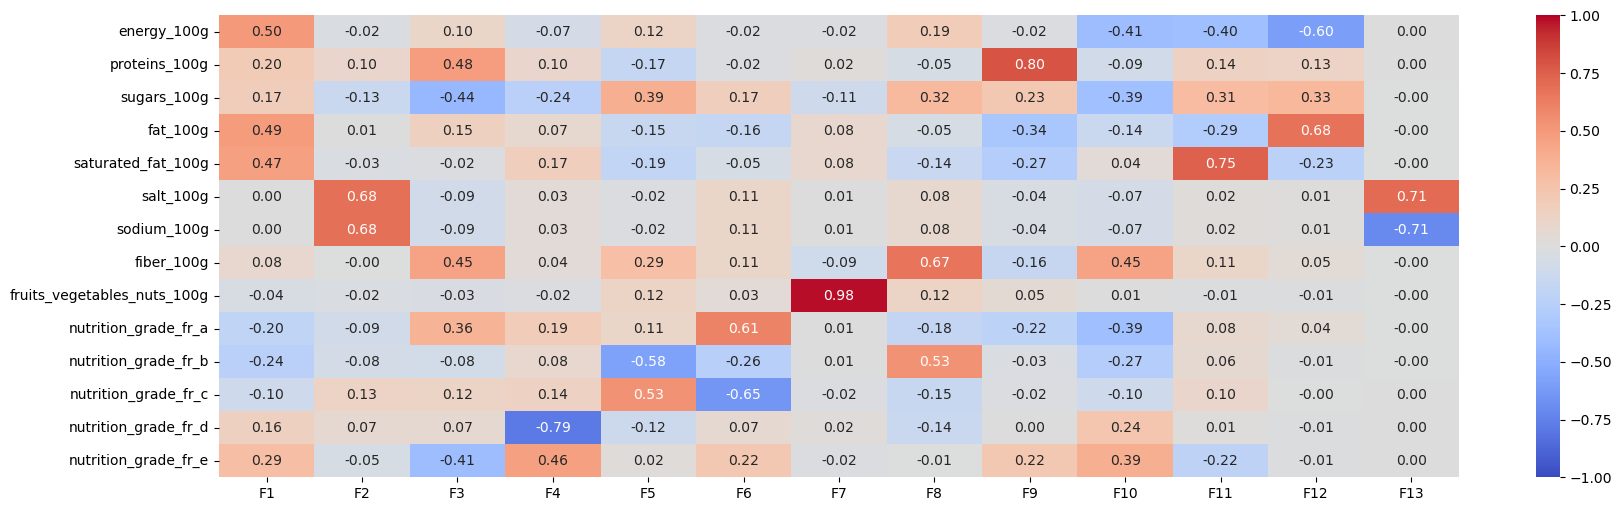

In [488]:
#représentation graphique
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

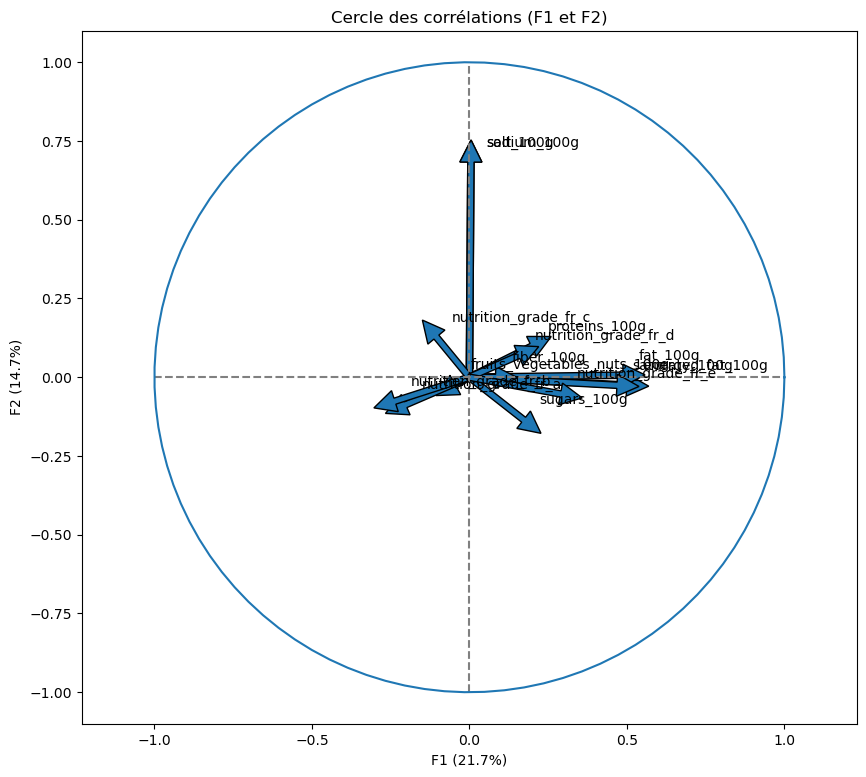

In [489]:
##Graphique de corrélation
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)